<img src='Brain_stroke.jpg'/></a>

# Brain Stroke Prediction

**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.**

A brain stroke, also known as a cerebrovascular accident (CVA), is a medical emergency that occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

## Problem Statement
   - The project brain stroke prediction aims to develop a predictive model or system that can identify whether individuals will face stroke based on the given features or not.

## Dataset Link
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Importing Data and Required Libraries
Importing NumPy, Pandas, Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For unusual warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("healthcare-dataset-stroke-data.csv")

##### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Attribute Information
**id** - unique identifier.

**gender** - "Male", "Female" or "Other".

**age** - age of the patient.

**hypertension** - 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

**heart_disease** - 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.

**ever_married** - "No" or "Yes".

**work_type** - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".

**Residence_type** - "Rural" or "Urban".

**avg_glucose_level** - average glucose level in blood.

**bmi** - body mass index.

**smoking_status** - "formerly smoked", "never smoked", "smokes" or "Unknown"*.

**stroke** - 1 if the patient had a stroke or 0 if not.

*Note: "Unknown" in smoking_status means that the information is unavailable for this patien

## Exploratory Data Analysis (EDA)

### Data Exploration

In [4]:
df1.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3999,67055,Female,31.00,0,0,Yes,Private,Rural,77.01,31.3,formerly smoked,0
2012,34261,Male,0.64,0,0,No,children,Rural,86.74,16.2,Unknown,0
416,27029,Female,3.00,0,0,No,children,Urban,73.20,16.8,Unknown,0
1320,52457,Female,58.00,0,1,Yes,Private,Rural,144.16,26.0,smokes,0
2043,15225,Male,18.00,0,0,No,Private,Rural,108.87,21.5,Unknown,0


#### Shape of the dataset

In [5]:
df1.shape

(5110, 12)

In [6]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Dataset information

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


*Clearly id has no relavence.*

In [8]:
df1 = df1.drop('id',axis=1)

In [9]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Data checks to perform 
   - Check Missing values
   - Check Duplicates
   - Check Data types
   - Check the number of unique values in each column
   - Check Statistics of dataset
   - Check Outliers
   - Check variuous categories which present in categorical column
   - Check Dataset is balanced or not

### Missing Values Analysis

In [10]:
missing_values = df1.isna().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

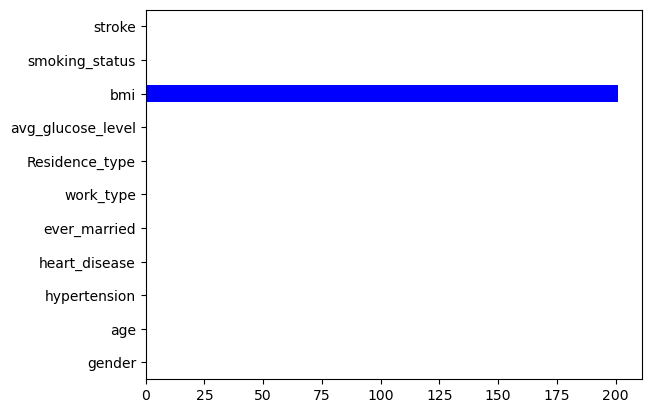

In [11]:
df1.isna().sum().plot.barh(color='blue')

*There are 201 missing values in bmi column.*

**Checking how many percentage of missing values present**

In [12]:
missing_percentage = 100.0*missing_values/df1.shape[0]
missing_percentage

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [13]:
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

                   Missing Values  Percentage
gender                          0    0.000000
age                             0    0.000000
hypertension                    0    0.000000
heart_disease                   0    0.000000
ever_married                    0    0.000000
work_type                       0    0.000000
Residence_type                  0    0.000000
avg_glucose_level               0    0.000000
bmi                           201    3.933464
smoking_status                  0    0.000000
stroke                          0    0.000000


In [14]:
df1[df1['bmi'].isna()==True]['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

*There are 3.94 % missing values present in our data set, in which 40 of them having chance of Stroke so we can't drop this.*

We will fill these values, to fill these values we use knn imputation.

**KNN Imputer** 
- www.scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [16]:
columns_with_missing = ['bmi']

# Filling missing values using KNN imputation
df1['bmi'] = imputer.fit_transform(df1[columns_with_missing])

In [17]:
df1['bmi'].isna().sum()

0

In [18]:
df1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

*Now there are no missing values.*

In [19]:
df1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Univariate Analysis

In [20]:
for col in df1.select_dtypes(include=['object']):
    print(col,' --> ',df1[col].unique())

gender  -->  ['Male' 'Female' 'Other']
ever_married  -->  ['Yes' 'No']
work_type  -->  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  -->  ['Urban' 'Rural']
smoking_status  -->  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [21]:
# Analyze the distribution of numeric variables
numeric_variables = df1.select_dtypes(include=['float64', 'int64'])
numeric_variables.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:
# Analyze the distribution of categorical variables
categorical_variables = df1.select_dtypes(include=['object'])
categorical_variables.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Bivariate Analysis

In [23]:
# Exploring relationship between target variable ('stroke') and other variables
df1.groupby('stroke').mean()  # Mean values for each variable by stroke category

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.825388
1,67.728193,0.265060,0.188755,132.544739,30.217789


In [24]:
numeric_feature = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_feature = [feature for feature in df1.columns if df1[feature].dtype == 'O']

print(f"we have {len(numeric_feature)} numeric features",numeric_feature)
print(f"we have {len(categorical_feature)} categorical features",categorical_feature)

we have 6 numeric features ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
we have 5 categorical features ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


**Check Duplicates**

In [25]:
df1.duplicated().sum()

0

*There are no duplicates present in dataset*

In [26]:
# df1.nunique()

### Outlier Detection

In [27]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


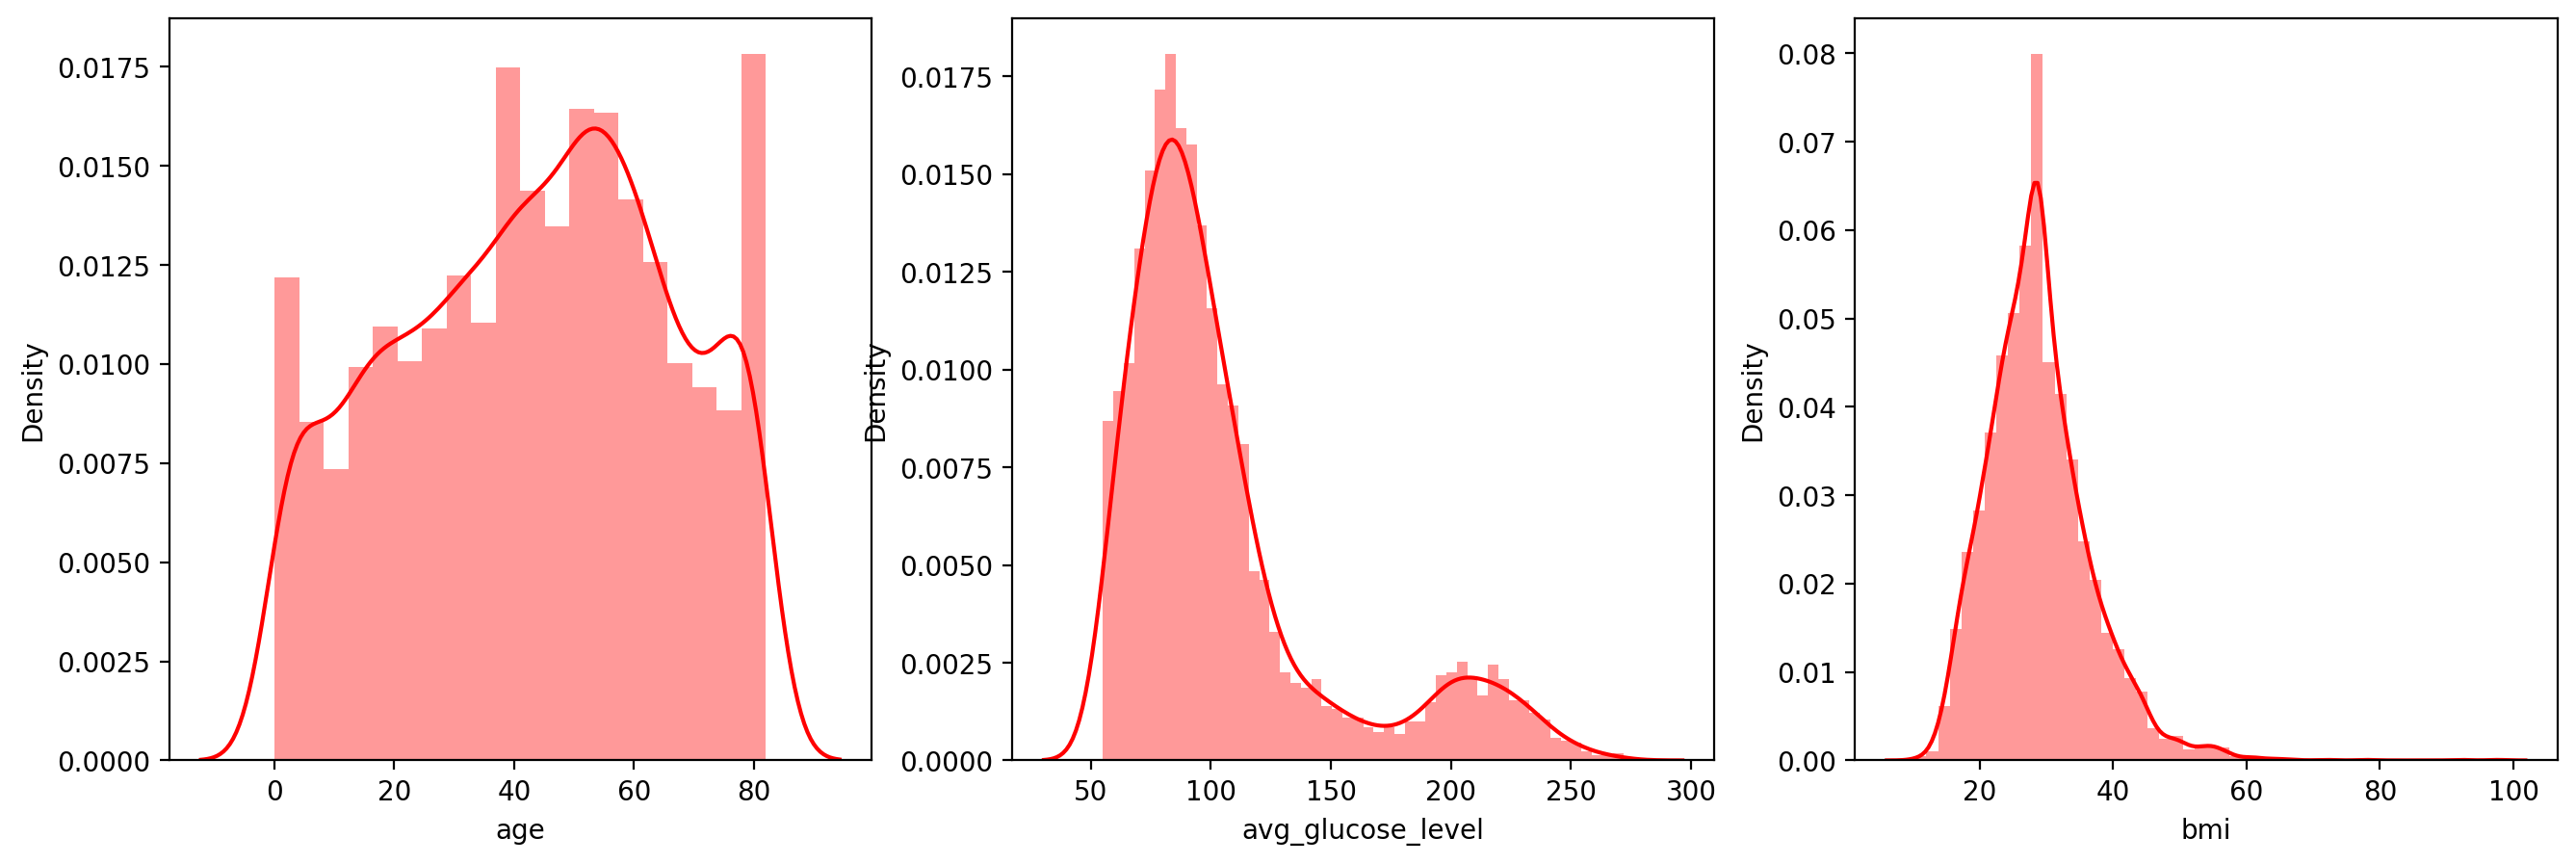

In [28]:
i = 1
plt.figure(figsize=(16,5),dpi=200)
for col in df1.select_dtypes(include=['float64']):
    plt.subplot(1,3,i)
    sns.distplot(df1[col],color='r')
    i = i+1

*Not Normally distributed* (age is somthing like normal ditributed)

In [29]:
print(df1['age'].skew())
print(df1['avg_glucose_level'].skew())
print(df1['bmi'].skew())

-0.1370593225984694
1.5722838665030459
1.0767160713842094


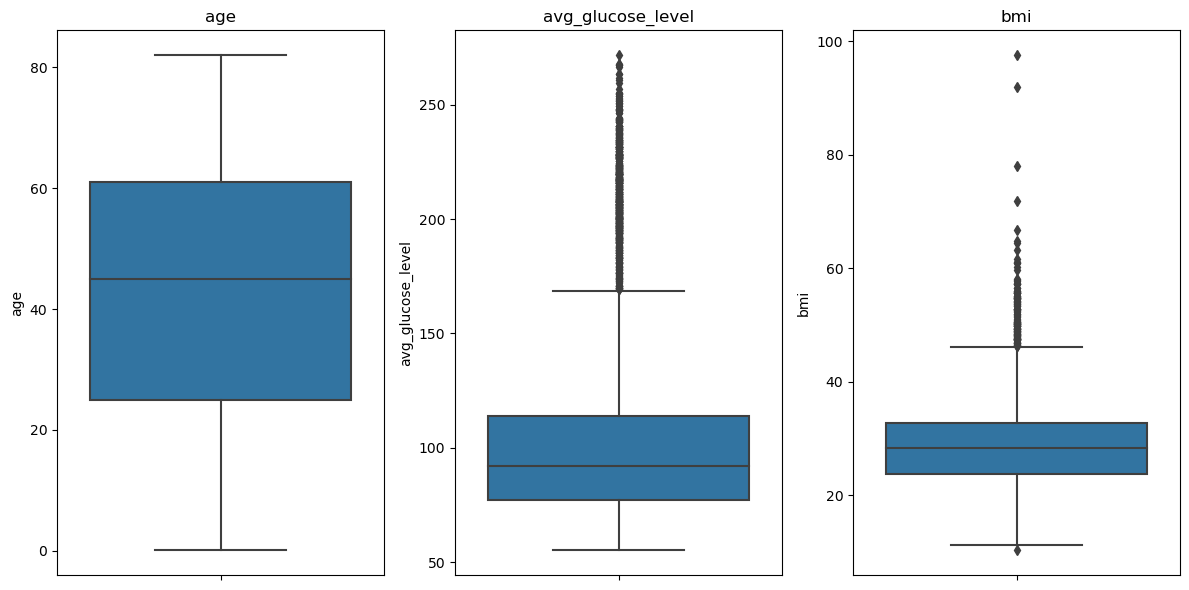

In [30]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**age column** *don't have an outlier*

**avg_glucose_level column**

In [31]:
Q1 = df1['avg_glucose_level'].quantile(0.25)
Q3 = df1['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

df1[(df1['avg_glucose_level'] < (Q1 - 1.5*IQR)) | (df1['avg_glucose_level'] > (Q3 + 1.5*IQR))]['stroke'].value_counts()

0    543
1     84
Name: stroke, dtype: int64

*We are not going to removing these becouse if we remove then we can lose important information since there could be possible that becouse of these there are having stroke as we can see 84 values are belonging to 1 class.*

**bmi column**

In [32]:
Q1_2 = df1['bmi'].quantile(0.25)
Q3_2 = df1['bmi'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

df1[(df1['bmi'] < (Q1_2 - 1.5*IQR_2)) | (df1['bmi'] > (Q3_2 + 1.5*IQR_2))]['stroke'].value_counts()

0    123
1      3
Name: stroke, dtype: int64

In [33]:
bmi_outlier = df1[(df1['bmi'] < (Q1_2 - 1.5*IQR_2)) | (df1['bmi'] > (Q3_2 + 1.5*IQR_2))]

bmi_outlier[bmi_outlier['stroke'] != 0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1


*We can conclude that high bmi(extreme outliers) is not causes stroke so we can remove that.*

In [34]:
outliers = bmi_outlier[bmi_outlier['stroke'] == 0]['bmi']>65
outliers

254     False
258     False
270     False
333     False
341     False
        ...  
4906    False
4952    False
5009    False
5057    False
5103    False
Name: bmi, Length: 123, dtype: bool

In [35]:
df = df1.drop(df1[df1['bmi']>65].index)

In [36]:
df['stroke'].value_counts()

0    4856
1     249
Name: stroke, dtype: int64

*We have dropped the outliers of BMI column without affecting positive stroke class.*

**BMI More info - https://en.wikipedia.org/wiki/Body_mass_index**

### Check dataset balanced or not

In [37]:
stroke_count = df['stroke'].value_counts()
stroke_count

0    4856
1     249
Name: stroke, dtype: int64

In [38]:
print(f"{round(100.0*stroke_count.iloc[1]/df.shape[0],2)} percentage data belongs to positive(1) class.")
print(f"{round(100.0*stroke_count.iloc[0]/df.shape[0],2)} percentage data belongs to negative(0) class.")

4.88 percentage data belongs to positive(1) class.
95.12 percentage data belongs to negative(0) class.


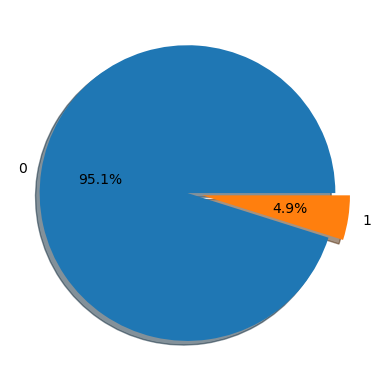

In [39]:
plt.pie(df["stroke"].value_counts(), labels=[0,1], shadow=True, explode=(0.05,0.05), autopct="%1.1f%%");

*Clearly dataset is not balanced as there is almost only 4.9% data belongs to the positive class.*

#### *we have a various techniques to handle imbalanced dataset such as under_sampler,oversampler(randomoversampler),SMOTETomek,Ensemble techniques(bagging or boosting) etc but we are starting with first and moving ahead and not seeing only the accuracy score instead we focus on recall, precesion, F1_score, confusion matrix etc and based on our requirement from dataset we choose a correct sampler.(NOTE - under sampler is not perform well when have a large dataset(eg. if data set have 200000 rows) it can be good for small datasets only(maxtime) we handle this when we are performing  model training.*

### Visualizations

**Age Feature Analysis**

<AxesSubplot:xlabel='age', ylabel='Density'>

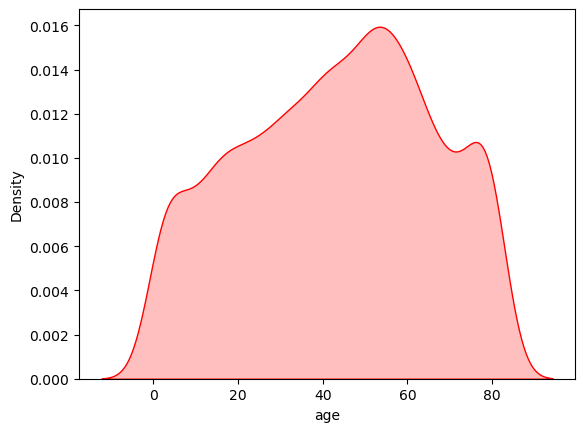

In [40]:
sns.kdeplot(df['age'],shade=True,color='red')

Text(0.5, 1.0, 'Age Distribution')

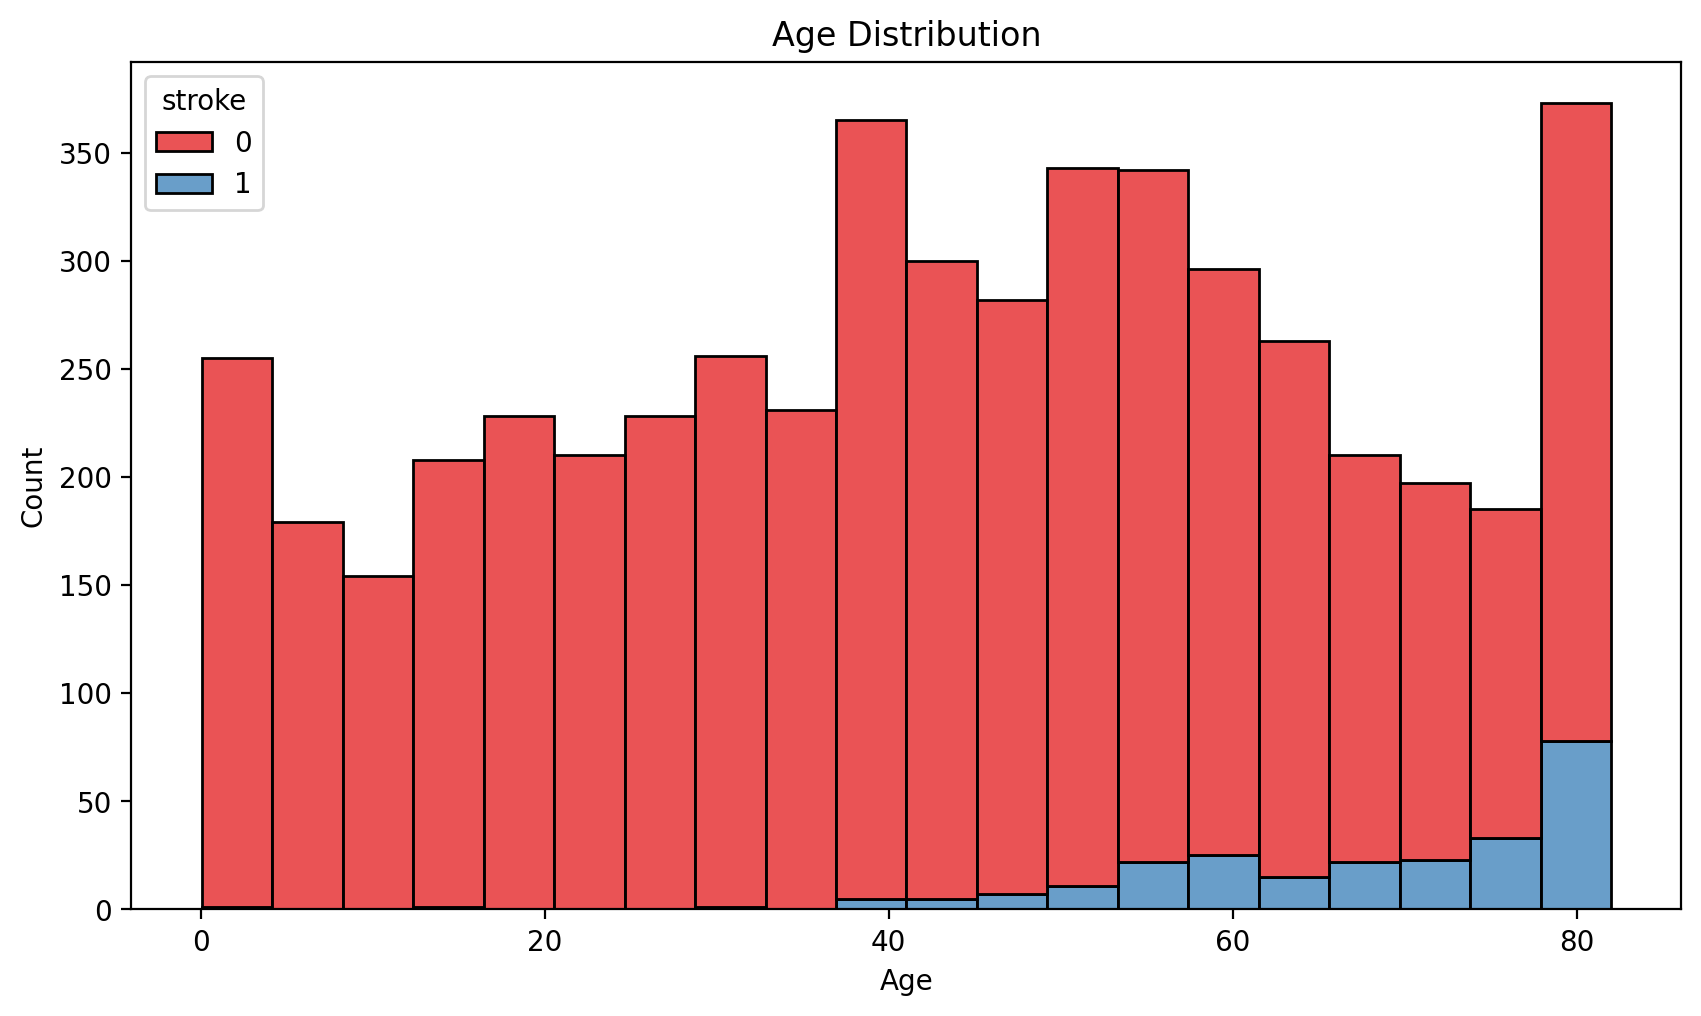

In [41]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='age',hue='stroke',multiple='stack',palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

**Insights**
   
   - *40-60 age group has high frequency in dataset,this age group contains maximum number of peoples*
   - *Older age causes more chances to getting Brain Stroke.*

In [42]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie chart will 

**Gender Feature Analysis**

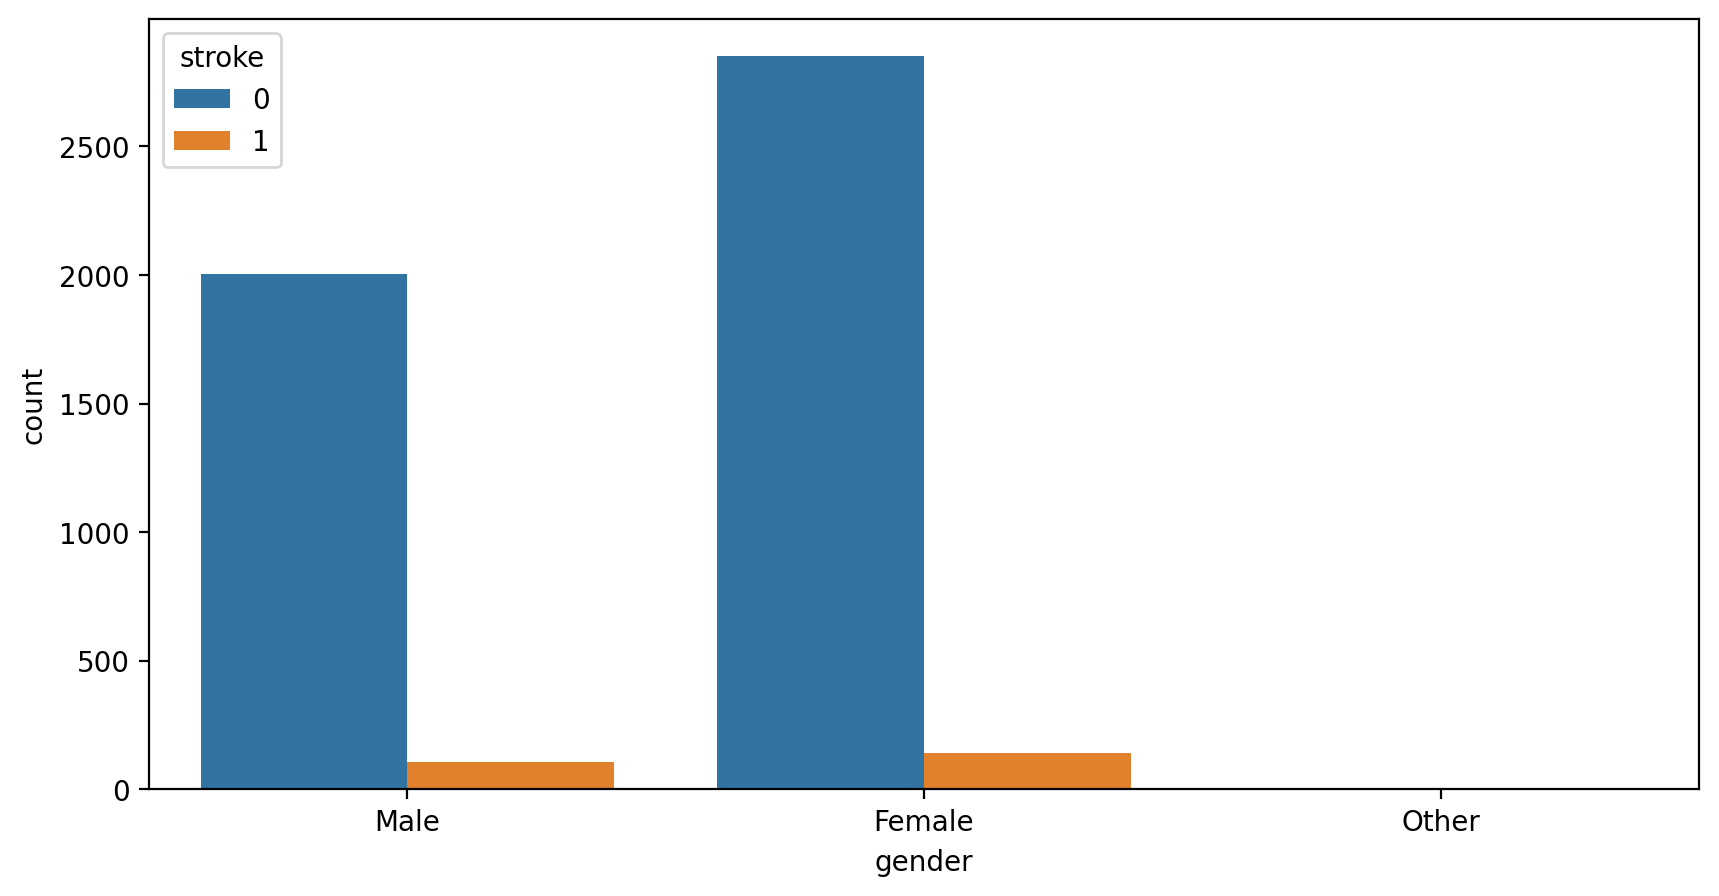

In [43]:
plt.figure(figsize= (10,5),dpi=200)
sns.countplot(data=df,x='gender',hue='stroke');

*It's better to drop other from gender.*

In [44]:
df = df.drop(df[df['gender']=='Other'].index)

In [45]:
df.shape

(5104, 11)

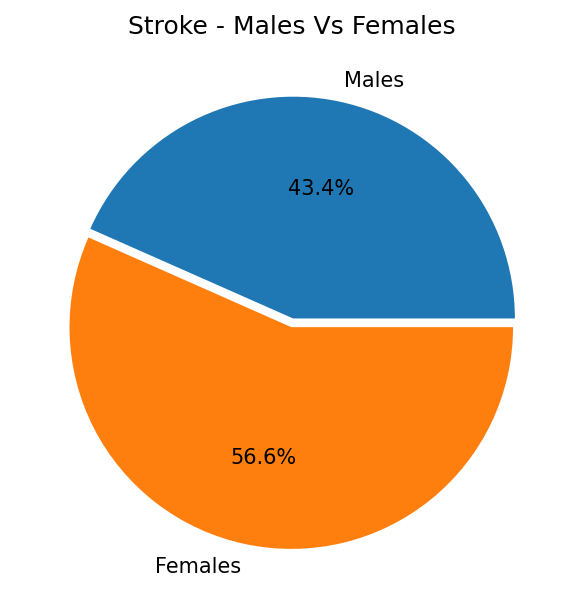

In [46]:
plt.figure(dpi=150)
M = df[df['gender']=='Male']['stroke'].value_counts()[1]
F = df[df['gender']=='Female']['stroke'].value_counts()[1]
plt.pie(x=[M,F], labels=['Males','Females'], explode=[0.02, 0.02], autopct='%.1f%%')
plt.title('Stroke - Males Vs Females');
# aitopct is used to show values correct to n decimal places(eg. .1f mns correct to 1 place)

**Insights**
    
   - *We can see as compare to males, females are having more chance of getting stroke*
   - *In chance of getting stroke 56.6% are females while 43.4% are males.*
   
  **NOTE** - In dataset also number of females is more then males.

**Hypertension Feature Analysis**

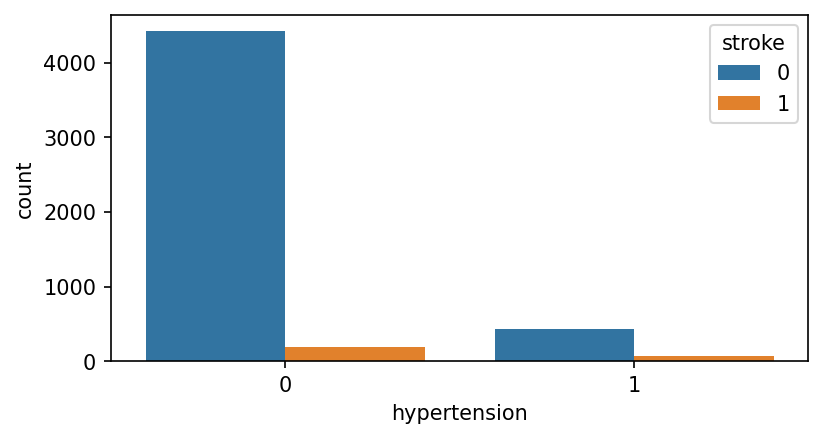

In [47]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='hypertension',hue='stroke');

**Insight**
    
   - *Majority of numbers doesn't have hypertansion.*
   - *In Stroke view percentage wise those are more likely to getting stroke who are having hypertension.*

**Heart Disease Analysis**

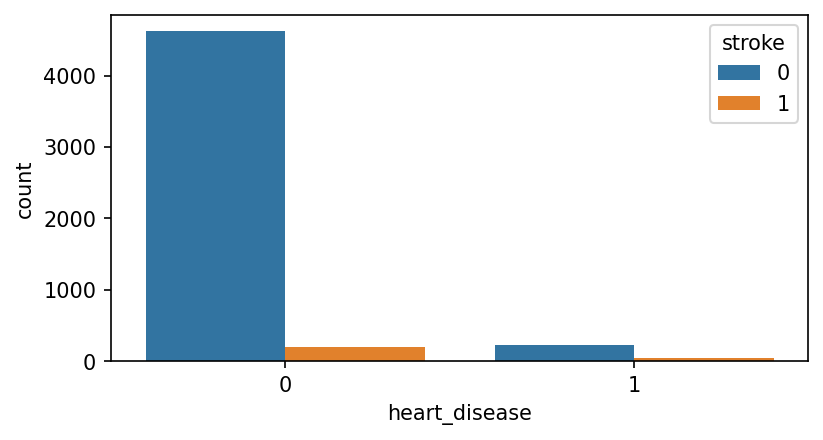

In [48]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='heart_disease',hue='stroke');

**Insight**
    
   - *Majority of numbers doesn't have heart disease.*
   - *In Stroke view and percentage wise those are more likely to getting stroke who have heart disease.*

**Work_type Feature Analysis**

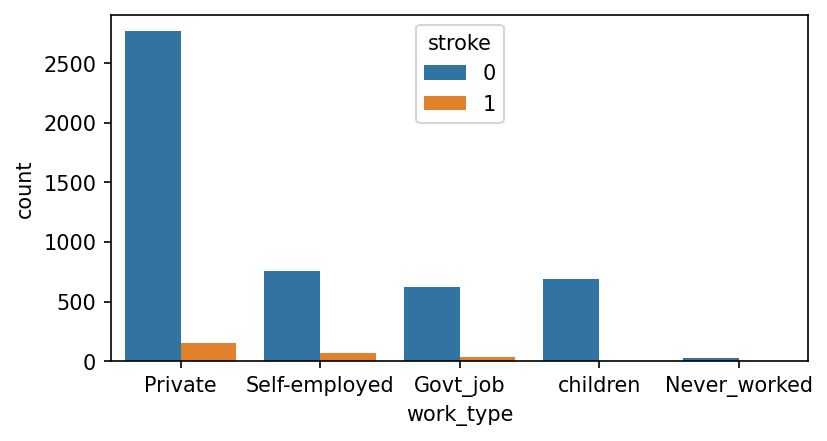

In [49]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='work_type',hue='stroke');

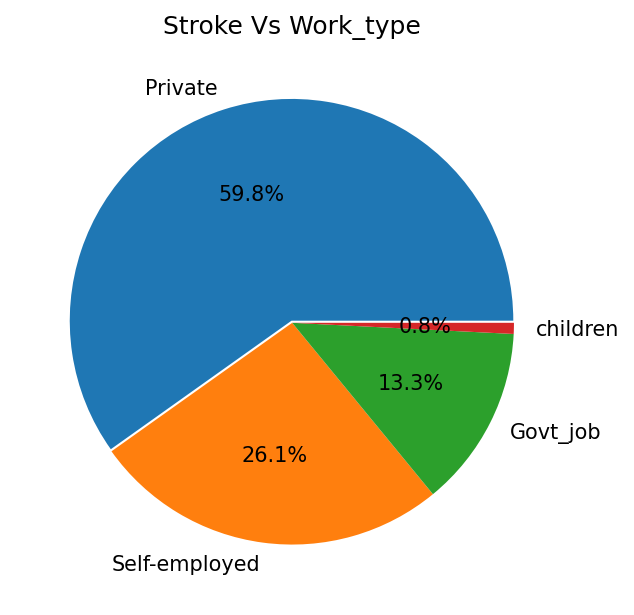

In [50]:
plt.figure(dpi=150)
W0 = df[df['work_type']=='Private']['stroke'].value_counts()[1]
W1 = df[df['work_type']=='Self-employed']['stroke'].value_counts()[1]
W2 = df[df['work_type']=='Govt_job']['stroke'].value_counts()[1]
W3 = df[df['work_type']=='children']['stroke'].value_counts()[1]
# W4 = df[df['work_type']=='Never_worked']['stroke'].value_counts()[1]
keys = ['Private','Self-employed','Govt_job','children']
plt.pie(x=[W0,W1,W2,W3], labels=keys, explode=[0.01, 0,0,0], autopct='%.1f%%')
plt.title('Stroke Vs Work_type');

**Insight**
    
   - *We can see that who are having work type Private they are more likely to getting Stroke, after that those who are self employed.*

**Residence_type Feature Analysis**

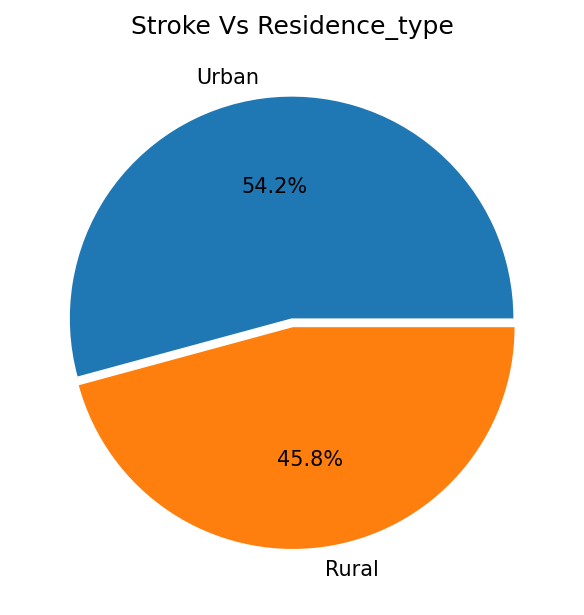

In [51]:
plt.figure(dpi=150)
U = df[df['Residence_type']=='Urban']['stroke'].value_counts()[1]
R = df[df['Residence_type']=='Rural']['stroke'].value_counts()[1]
plt.pie(x=[U,R], labels=['Urban','Rural'], explode=[0.02, 0.02], autopct='%.1f%%')
plt.title('Stroke Vs Residence_type');

**Insight**
    
   - *We can see those who are living in Urban area they have more chance of getting Stroke.*

**Smoking_status Feature Analysis**

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

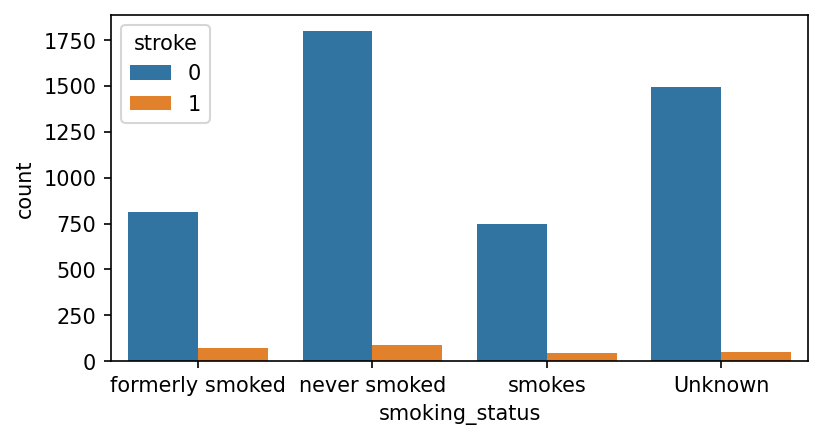

In [52]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot(data=df,x='smoking_status',hue='stroke')

**Married Feature Analysis**

<AxesSubplot:xlabel='stroke', ylabel='count'>

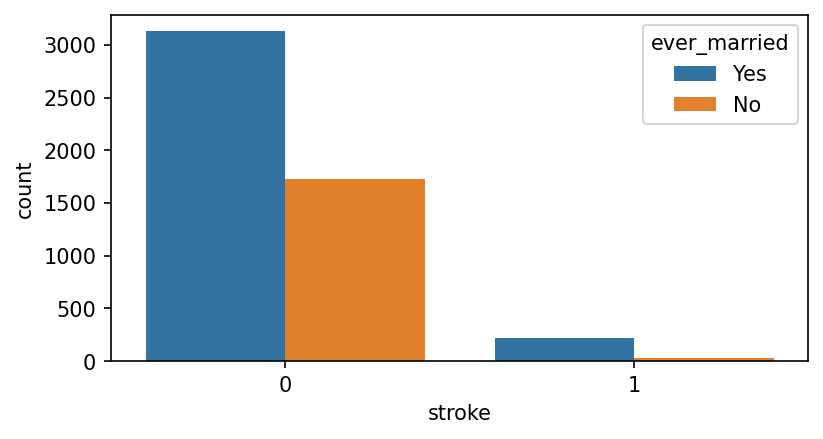

In [53]:
plt.figure(figsize= (6,3),dpi=150)
sns.countplot( data=df, x='stroke', hue='ever_married')

**Avg_glucose_level Feature Analysis**

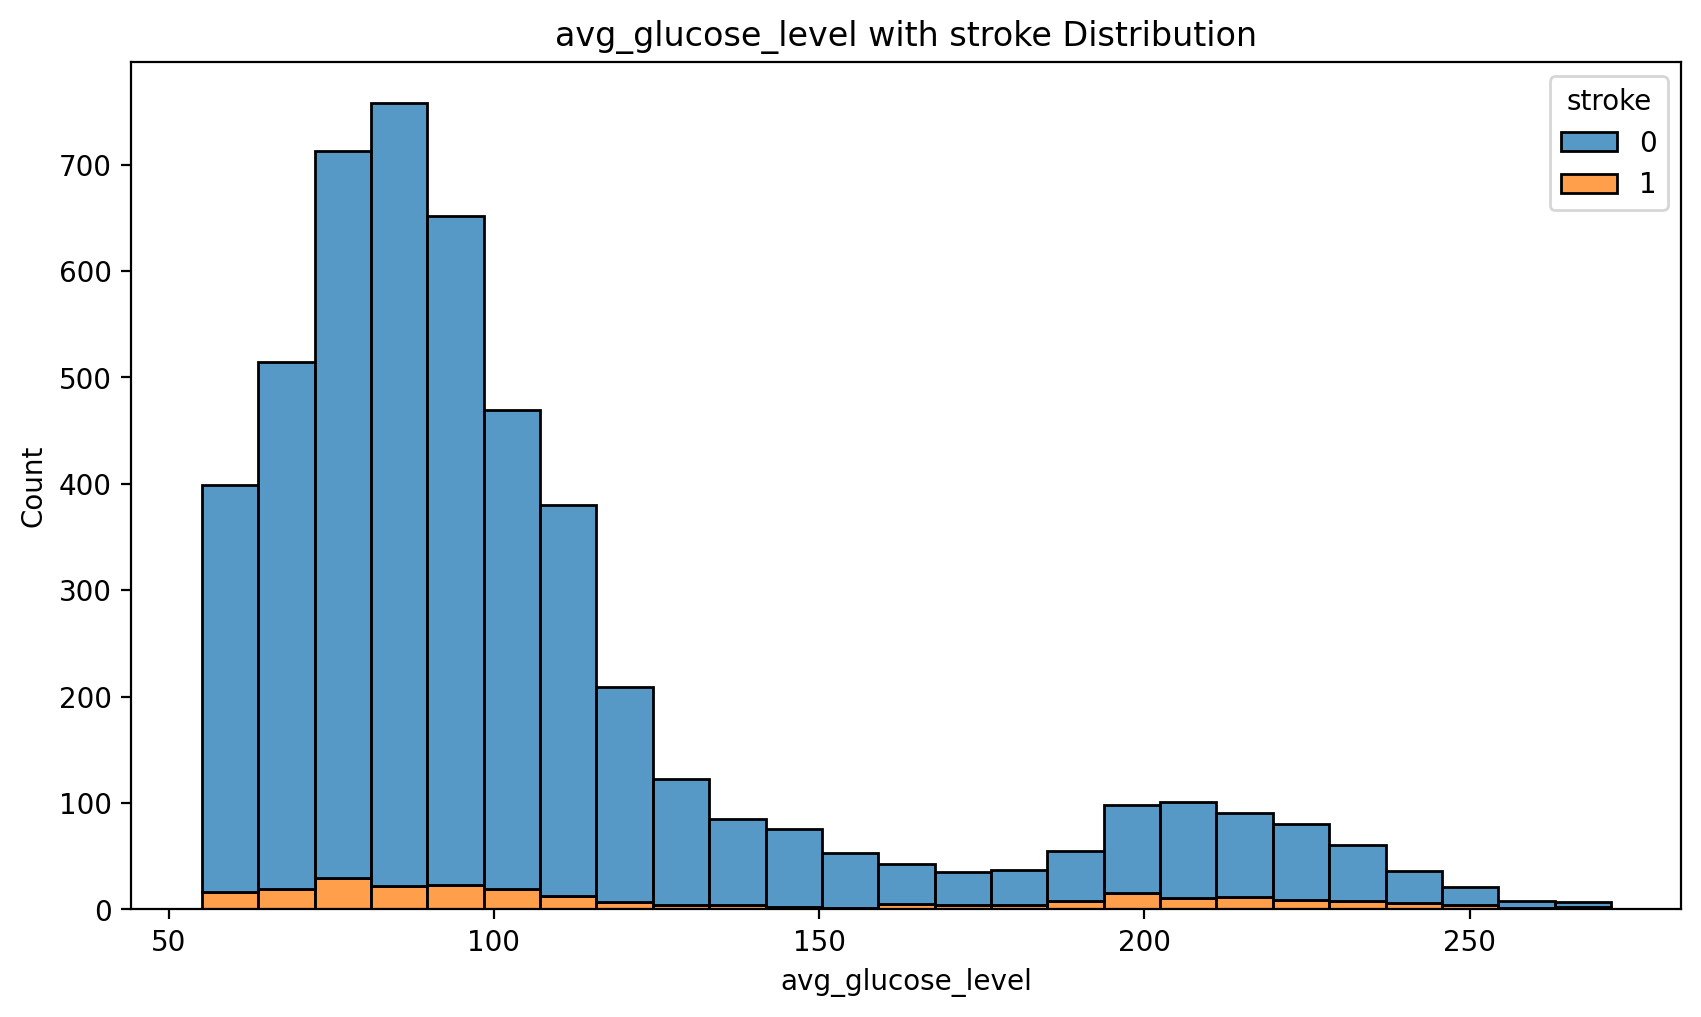

In [54]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='avg_glucose_level',hue='stroke',multiple='stack',bins=25)
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.title('avg_glucose_level with stroke Distribution');

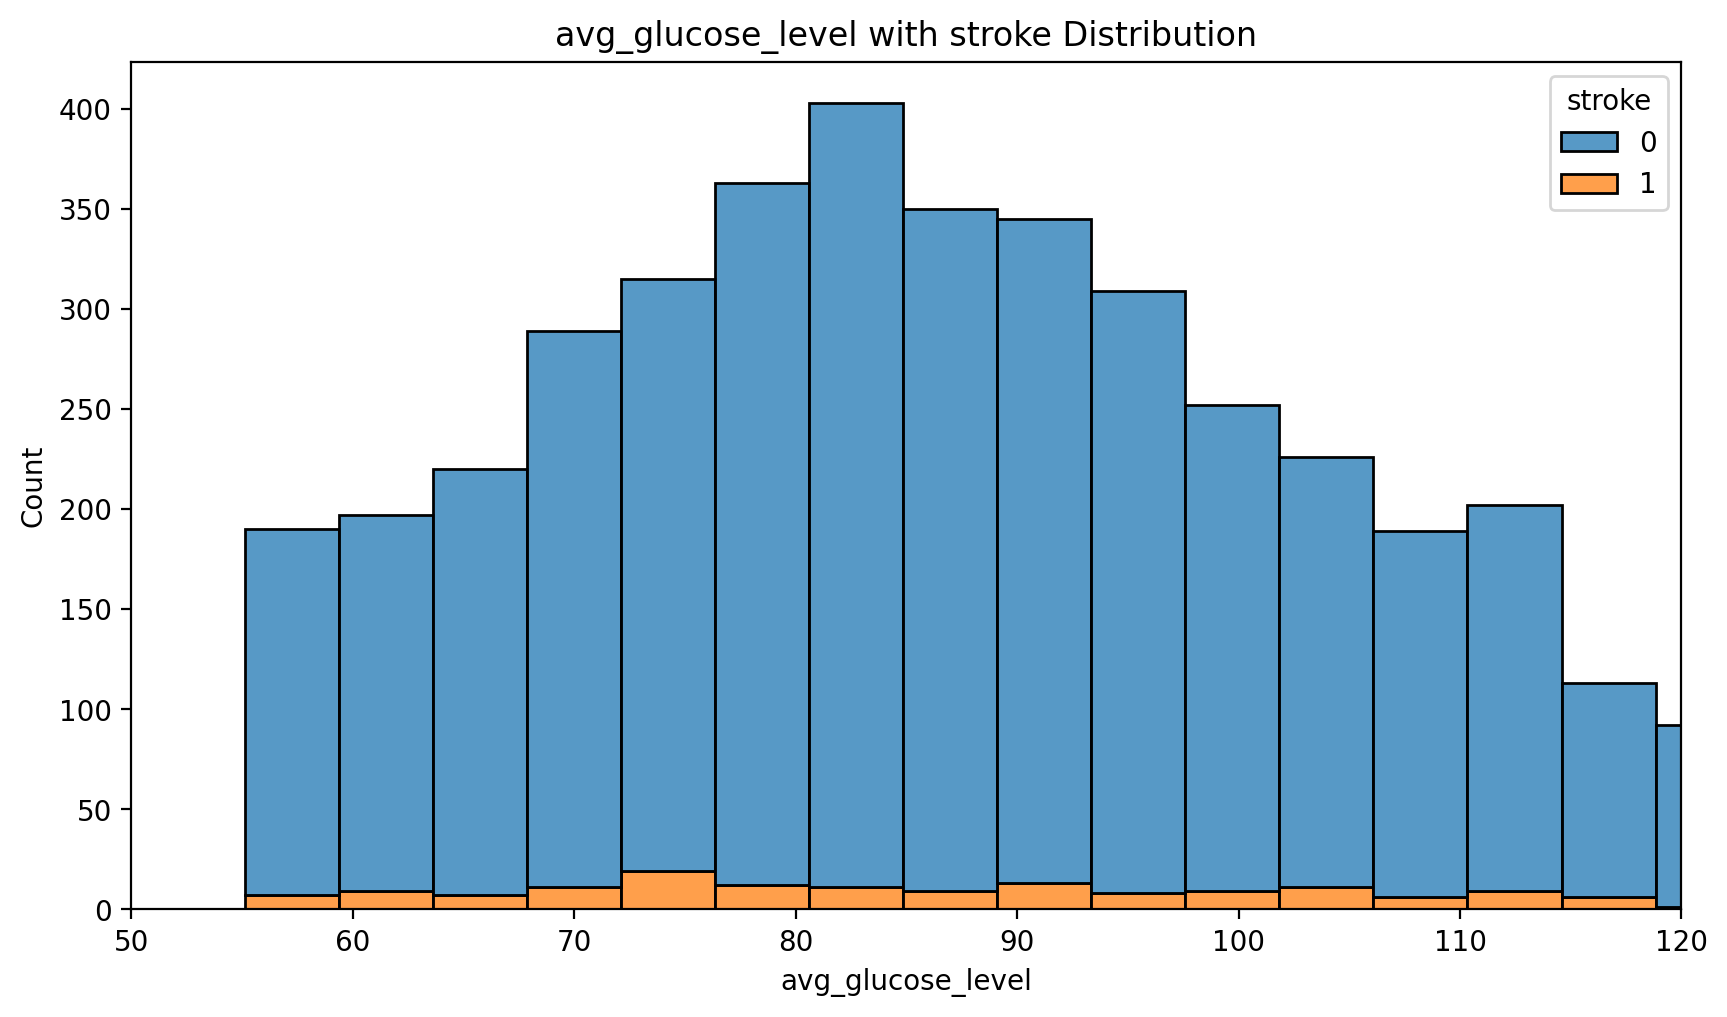

In [55]:
plt.figure(figsize=(10,5.5),dpi=200)
sns.histplot(data = df,x='avg_glucose_level',hue='stroke',multiple='stack')
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.xlim(50,120)
plt.title('avg_glucose_level with stroke Distribution');

**By WHO -
    The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L).**
    
**Insight**
    
   - *We can see most of them have balanced glucose level.*
   - *Those are more likely to get stroke, they have avg_glucose_level between 70 to 80.*

**Combined Feature Analysis**

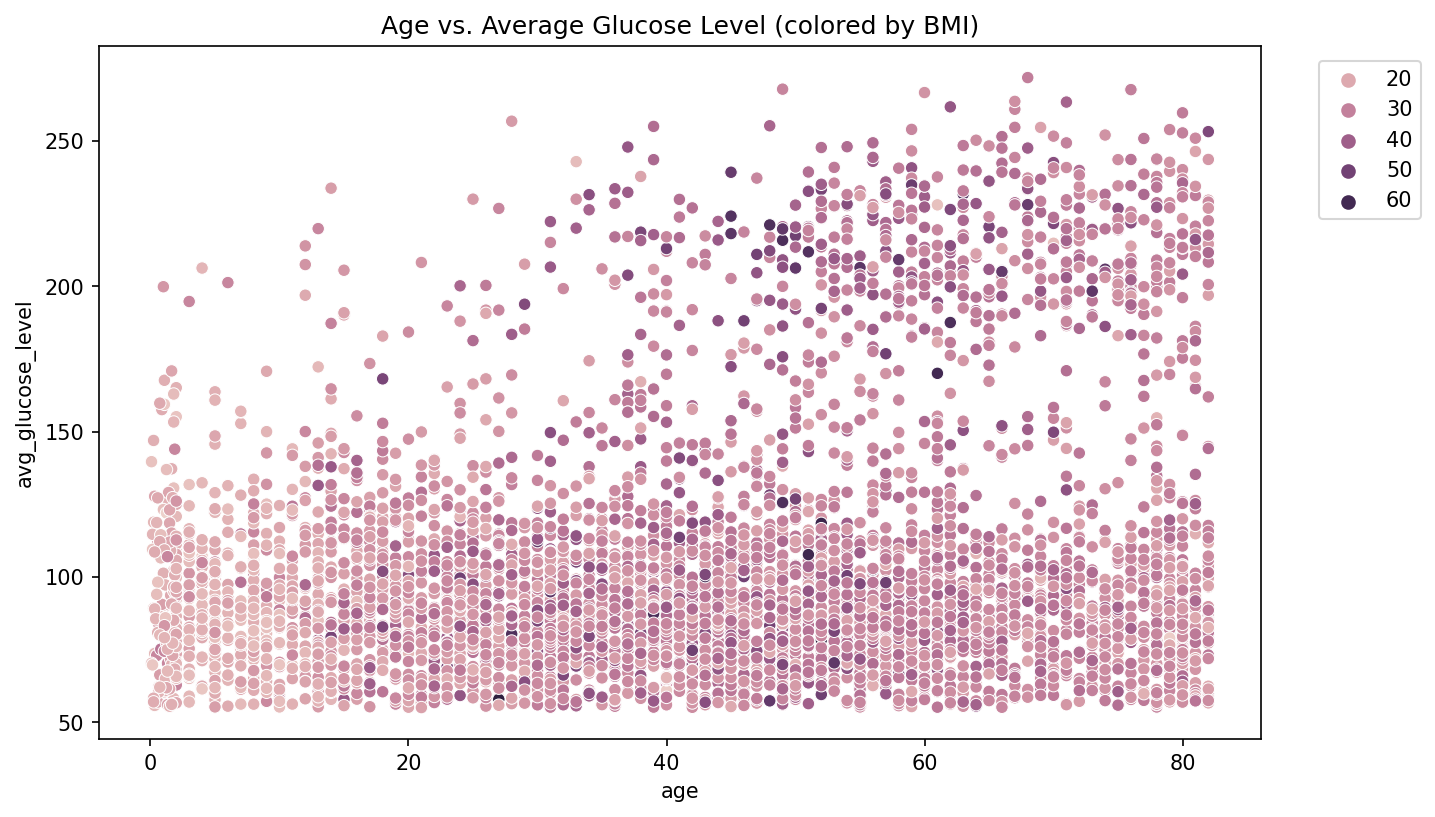

In [56]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue="bmi")
plt.title("Age vs. Average Glucose Level (colored by BMI)")
plt.legend(loc=(1.05,0.75))

**Insight**

   - *As age is increasing then avg_glucose_level is slightly going to increase.*
   - *bmi is also positively correlated with age and avg_glucose_level*

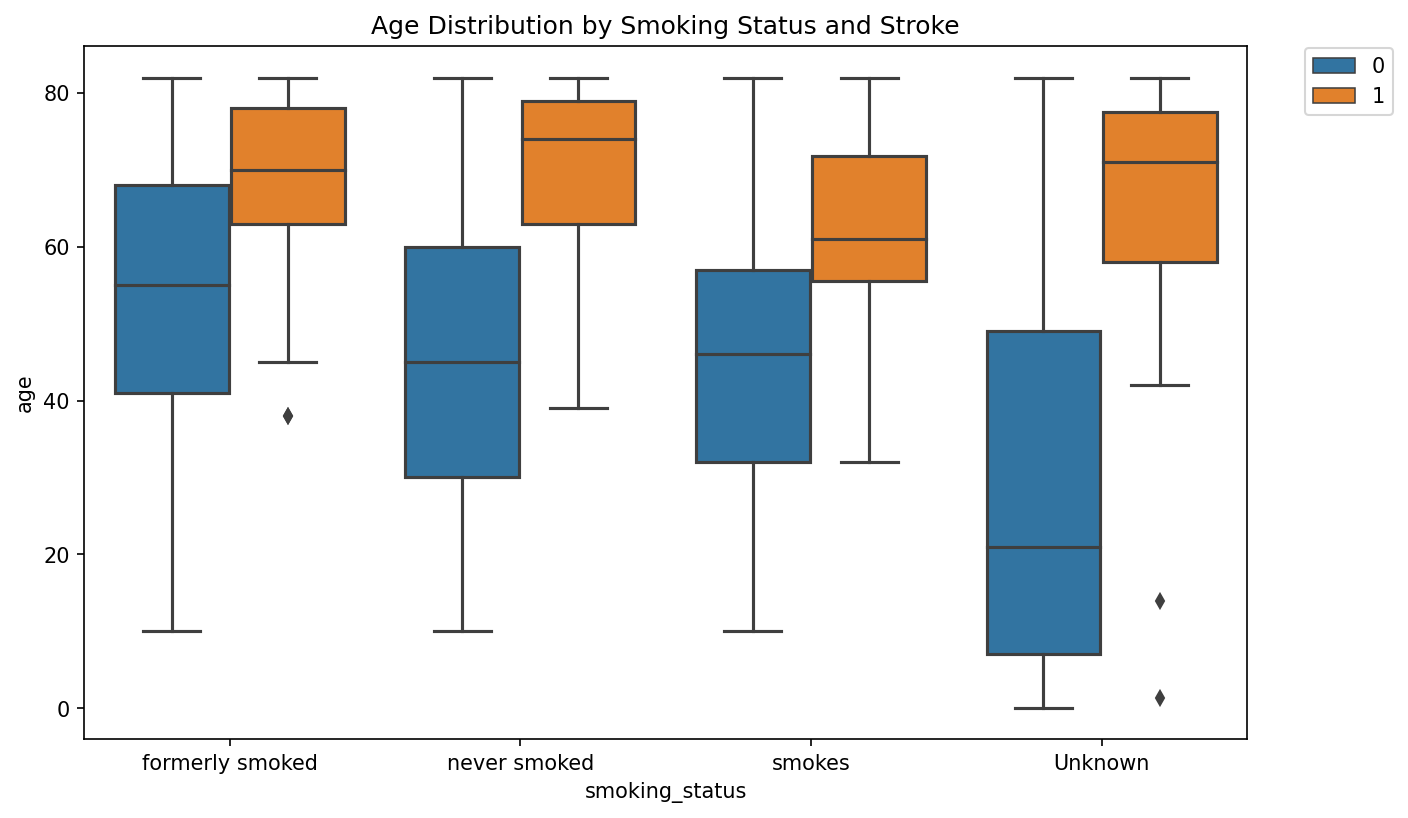

In [57]:
plt.figure(figsize=(10,6),dpi=150)
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke")
plt.title("Age Distribution by Smoking Status and Stroke")
plt.legend(loc=(1.05,0.9));

**Insights**
    
   - *Almost 75% of them who belongs to positive class are older then 55 year.*
   - *In all of them who does not have a chance to get Stroke they are not older then age 70.* 
   - *In this we can see that age distribution is almost same for never_smoked and smoked smoking status for them who havnn't chance to get Stroke(0).*
   - *Age distribution is almost same for them who are either never_smoked or formerly smoked and has chance to get Stroke,but the mean is slightly different.*
   

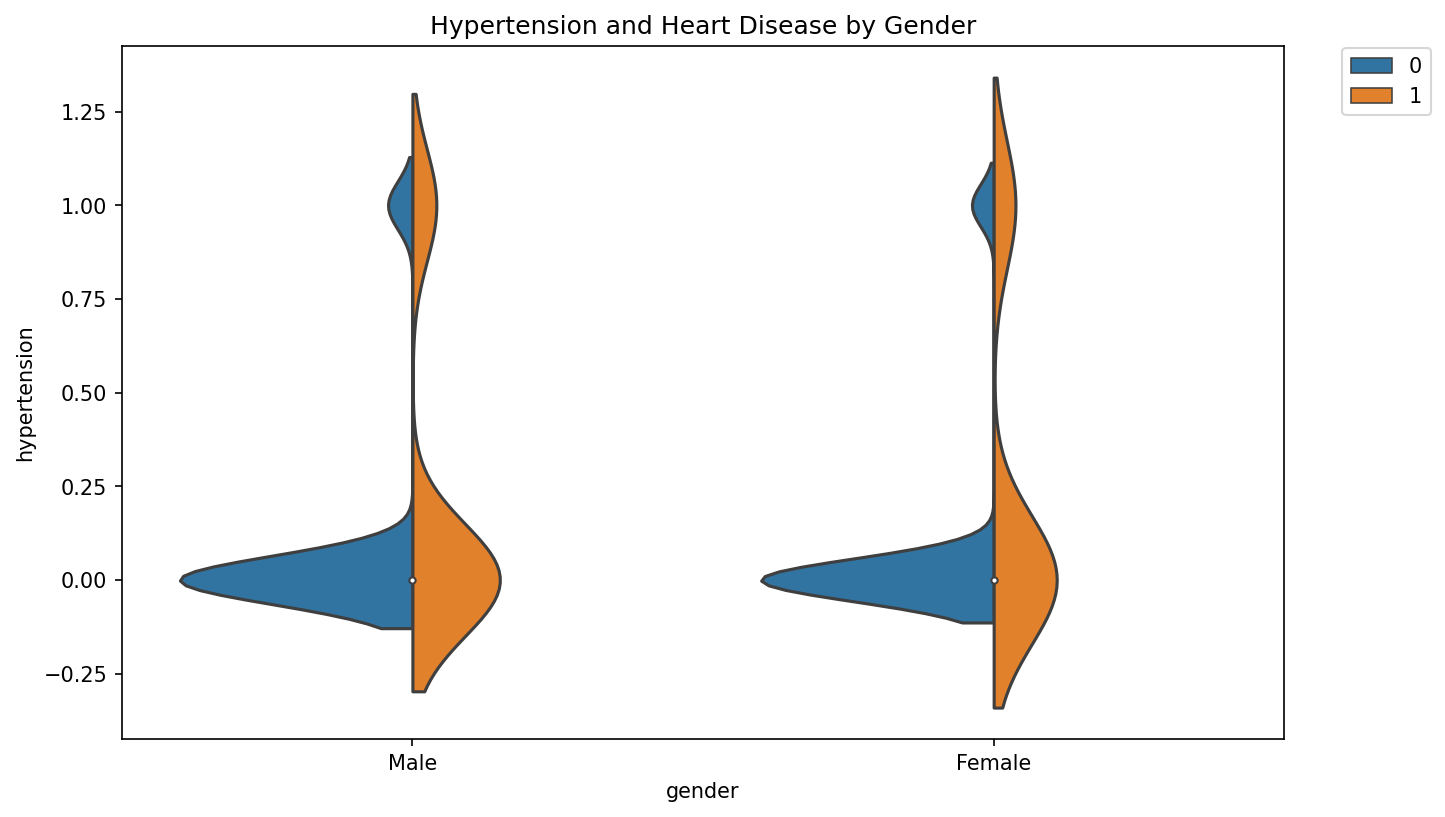

In [58]:
plt.figure(figsize=(10,6),dpi=150)
sns.violinplot(data=df, x="gender", y="hypertension", hue="heart_disease", split=True)
plt.title("Hypertension and Heart Disease by Gender")
plt.legend(loc=(1.05,0.9));

**Insight**

<Figure size 2400x1600 with 0 Axes>

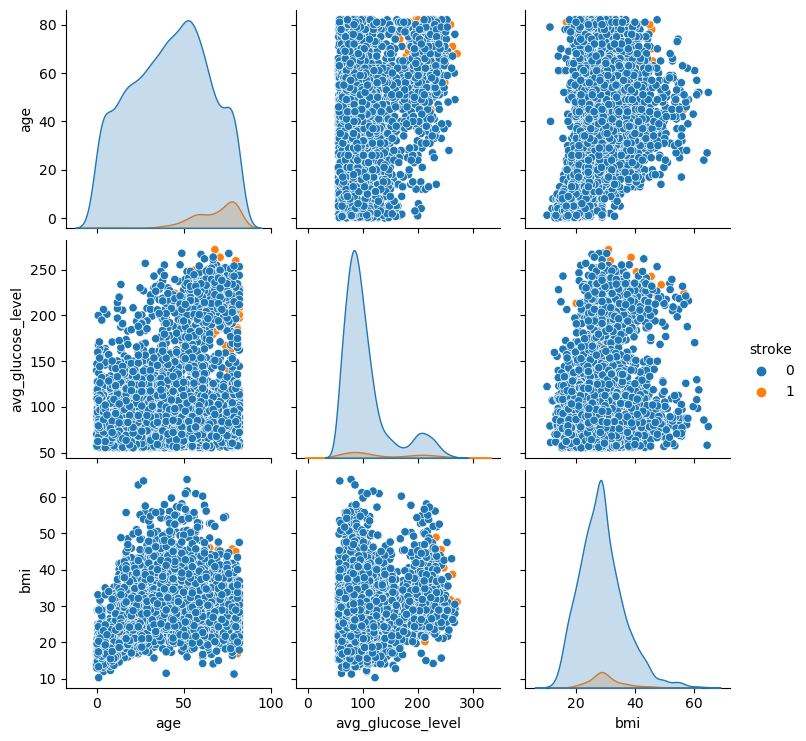

In [59]:
plt.figure(figsize=(12,8),dpi=200)
numerical_col_pair = df.select_dtypes(include=['float'])
numerical_col_pair['stroke'] = df['stroke']
sns.pairplot(numerical_col_pair,hue='stroke');

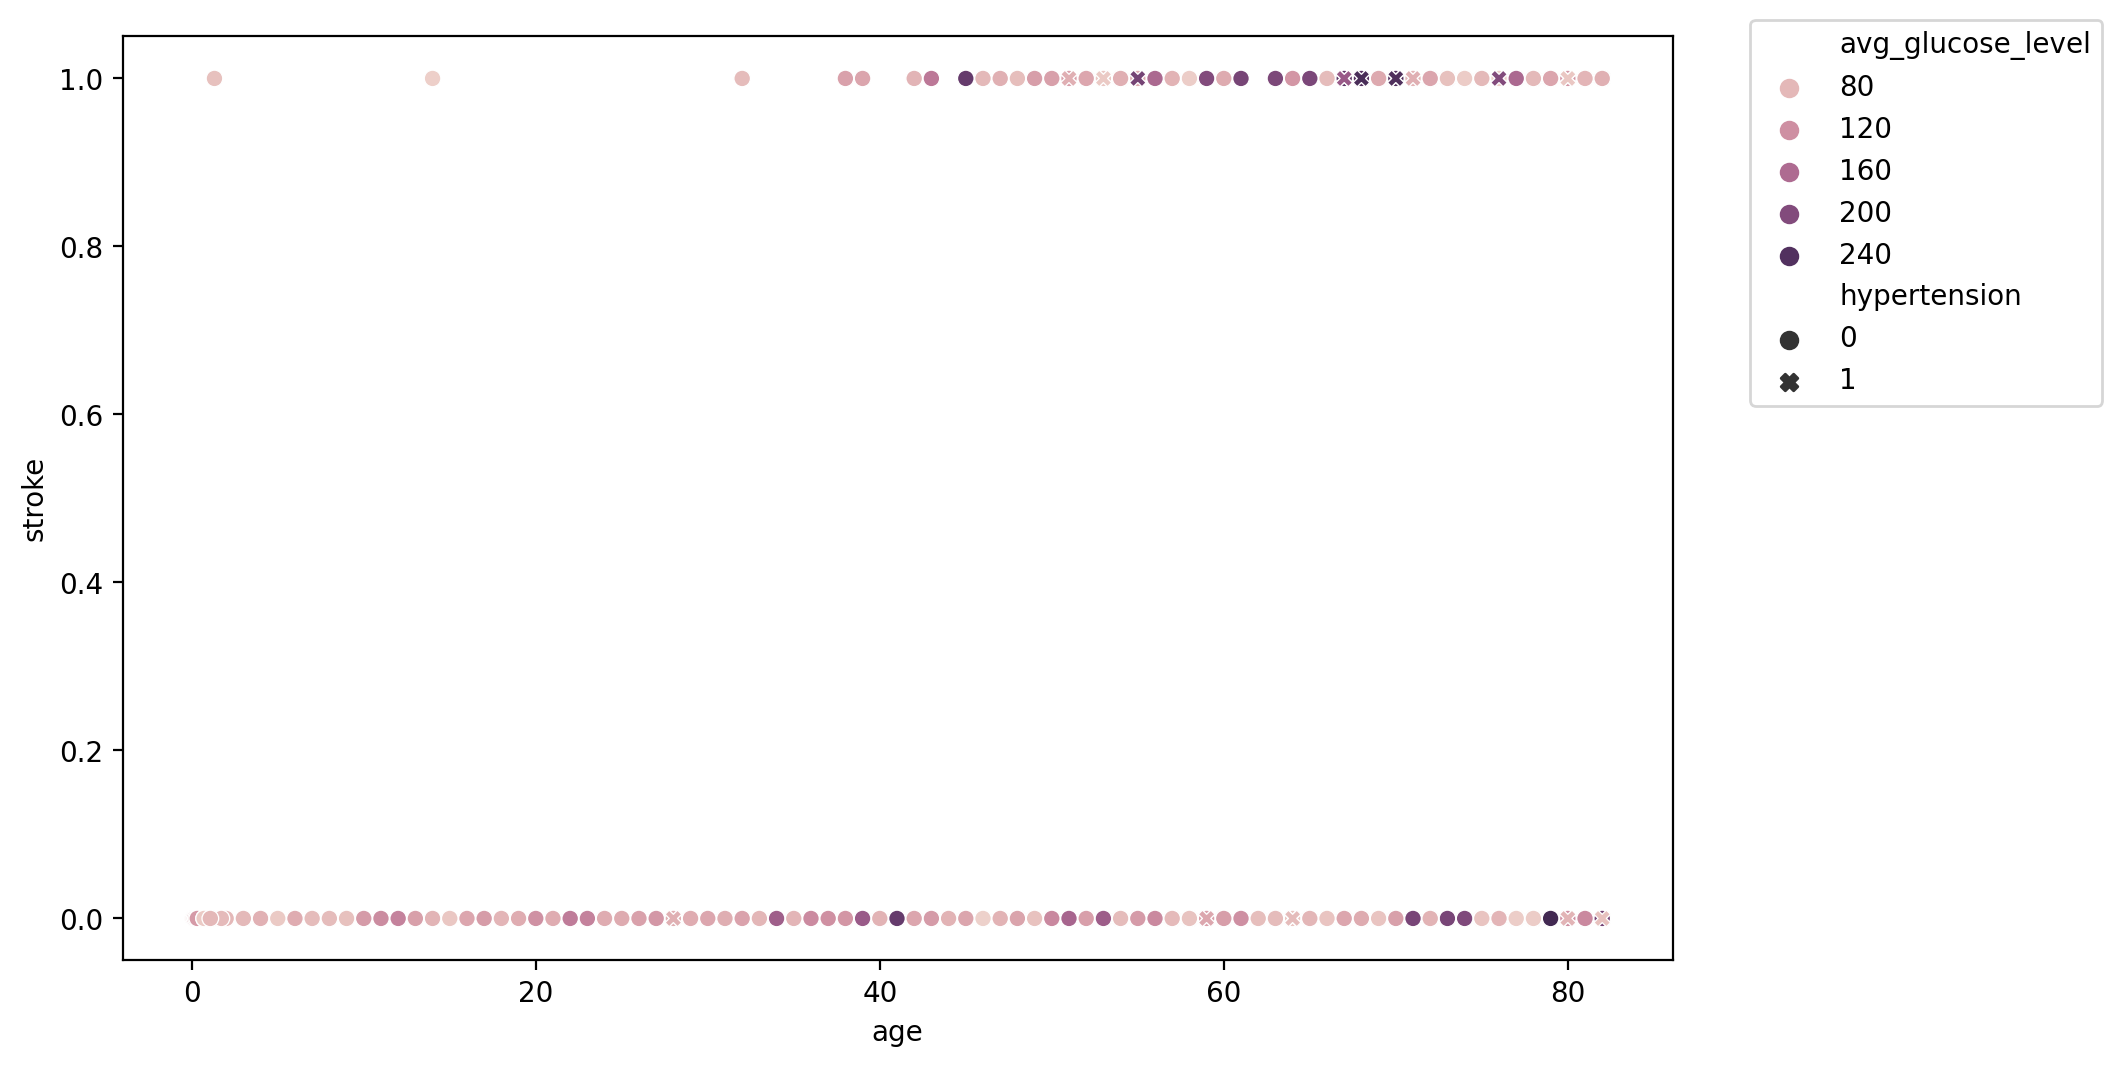

In [60]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='age',y='stroke',hue='avg_glucose_level',style='hypertension')
plt.legend(loc=(1.05,0.6));

**Insight**
    
   - *With increase in age and avg_glucose_level together hypertension(=1) there is more chance of having Stroke.*

### Feature Engineering

Converting categorical into numerical columns.

In [61]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


### Correlation Analysis

In [62]:
corr_wth_stroke =pd.DataFrame(df.corr()['stroke'].sort_values())
corr_wth_stroke

,stroke
work_type_children,-0.083984
work_type_Never_worked,-0.014900
smoking_status_never smoked,-0.004151
smoking_status_smokes,0.008954
gender_Male,0.009170
work_type_Private,0.012124
Residence_type_Urban,0.015286
bmi,0.041420
work_type_Self-employed,0.062061
smoking_status_formerly smoked,0.064590


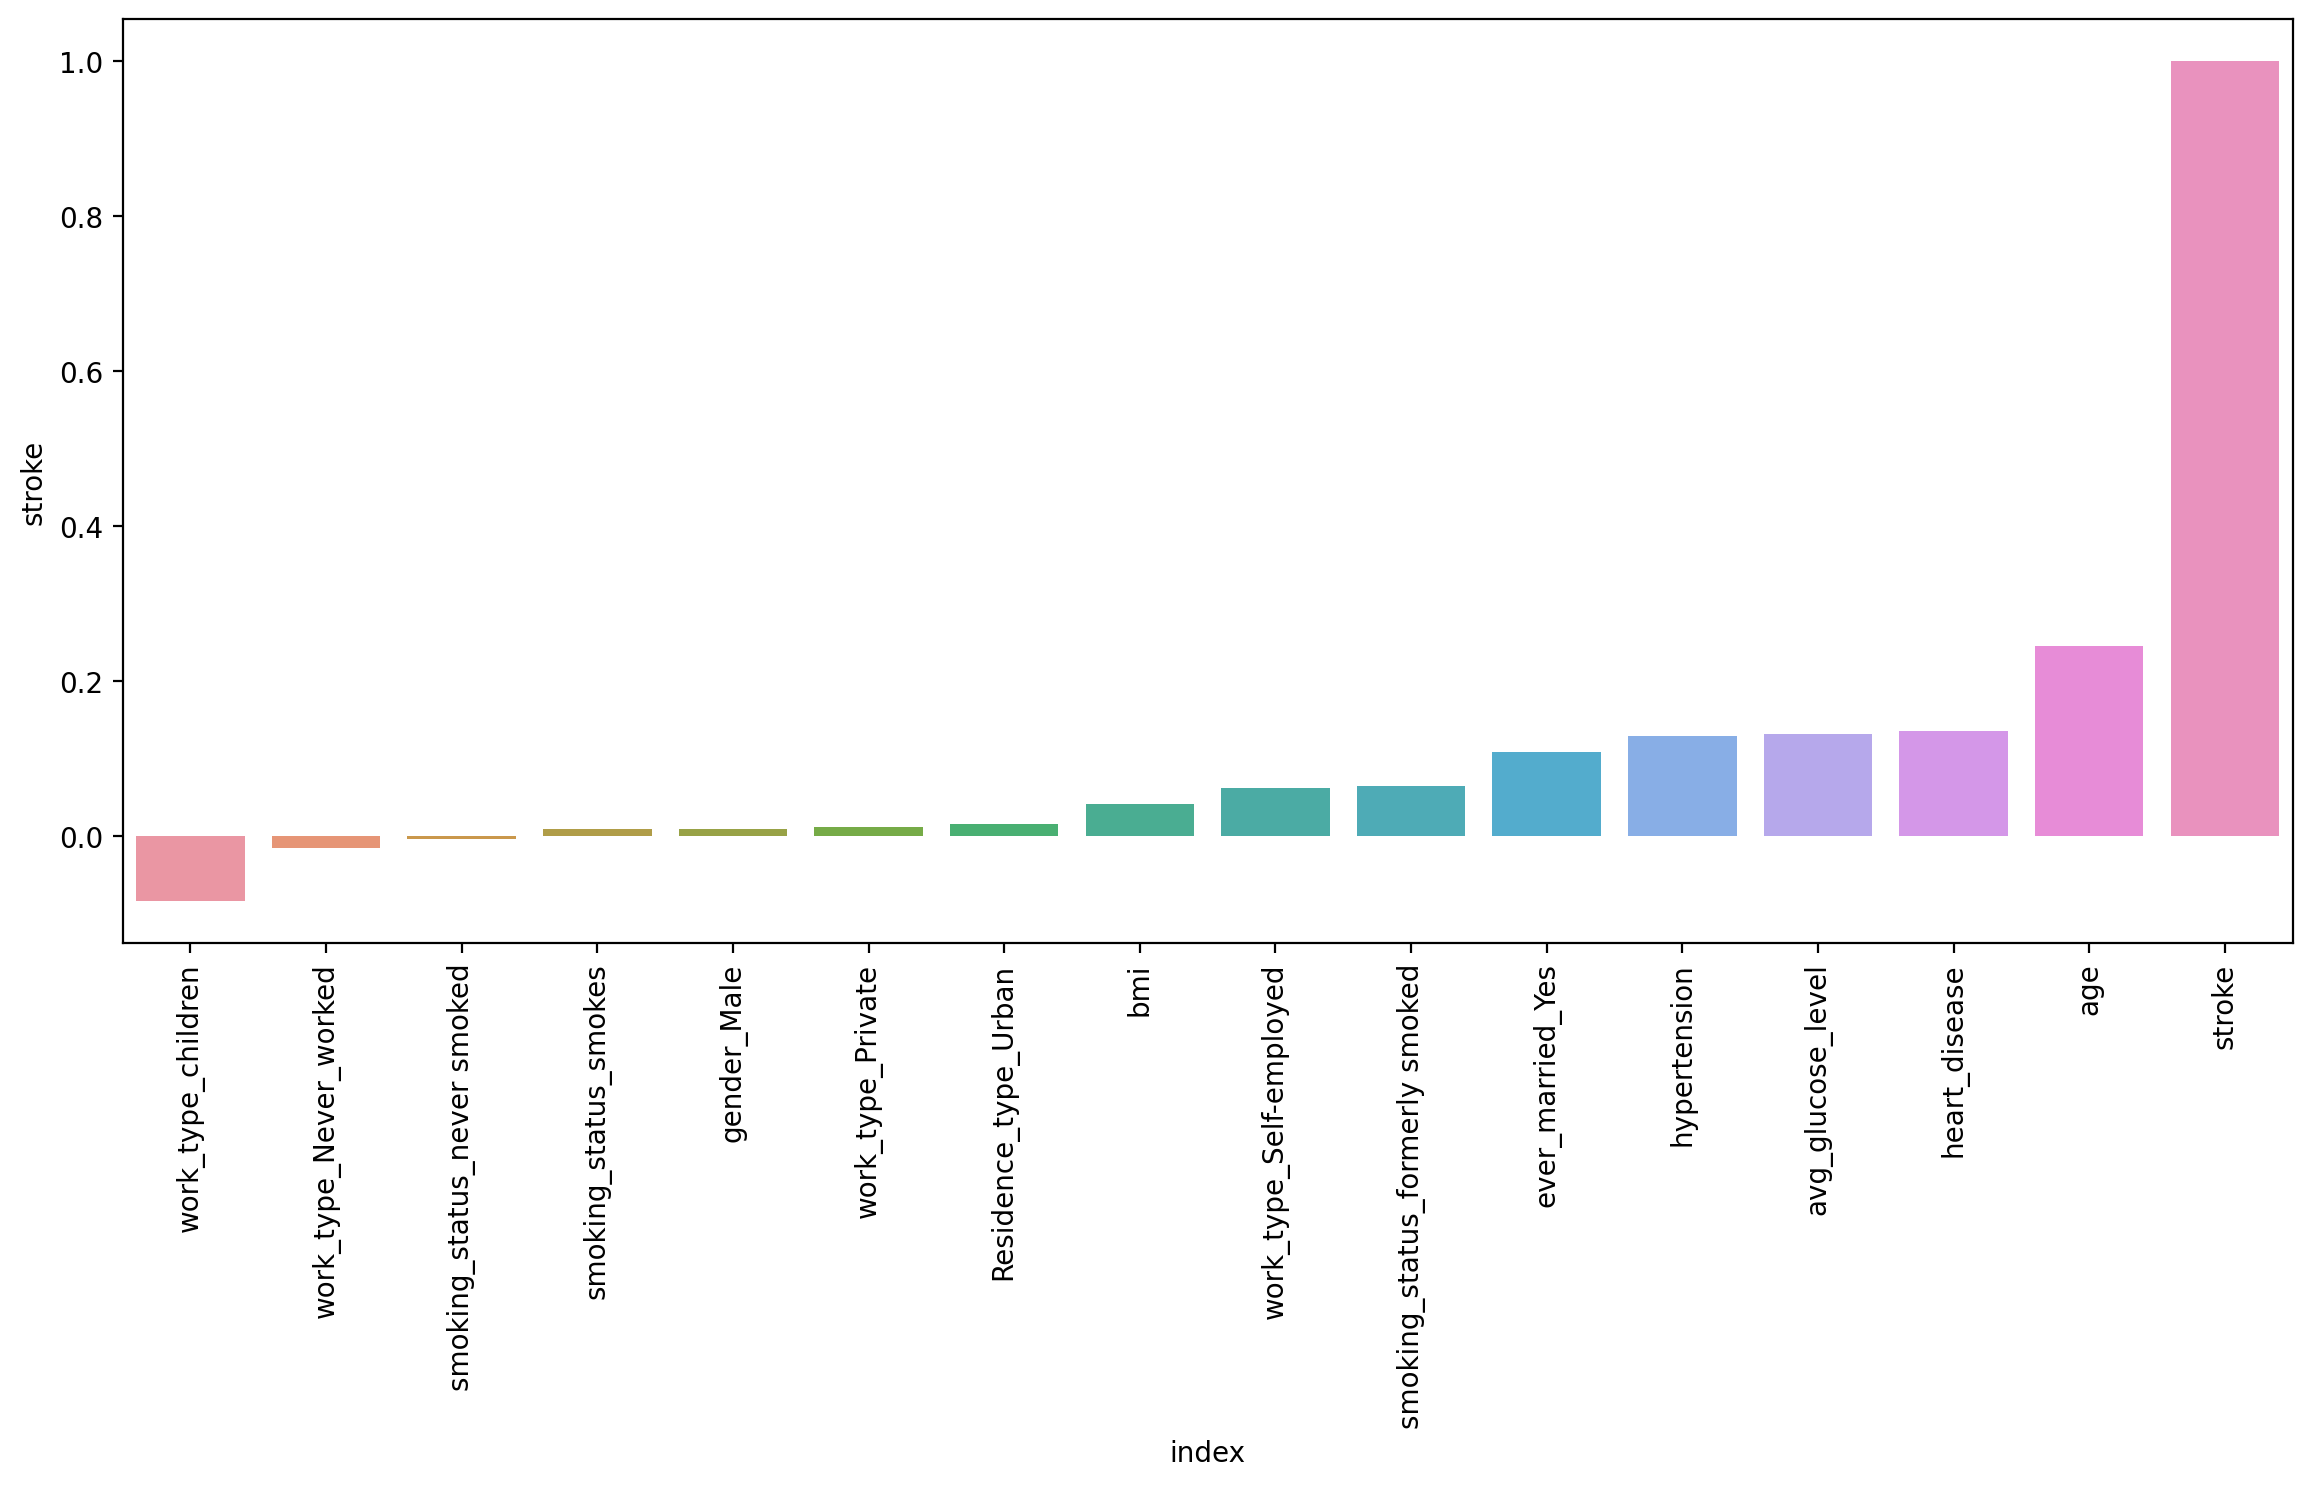

In [63]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=corr_wth_stroke.reset_index(),x='index',y='stroke')
plt.xticks(rotation=90);

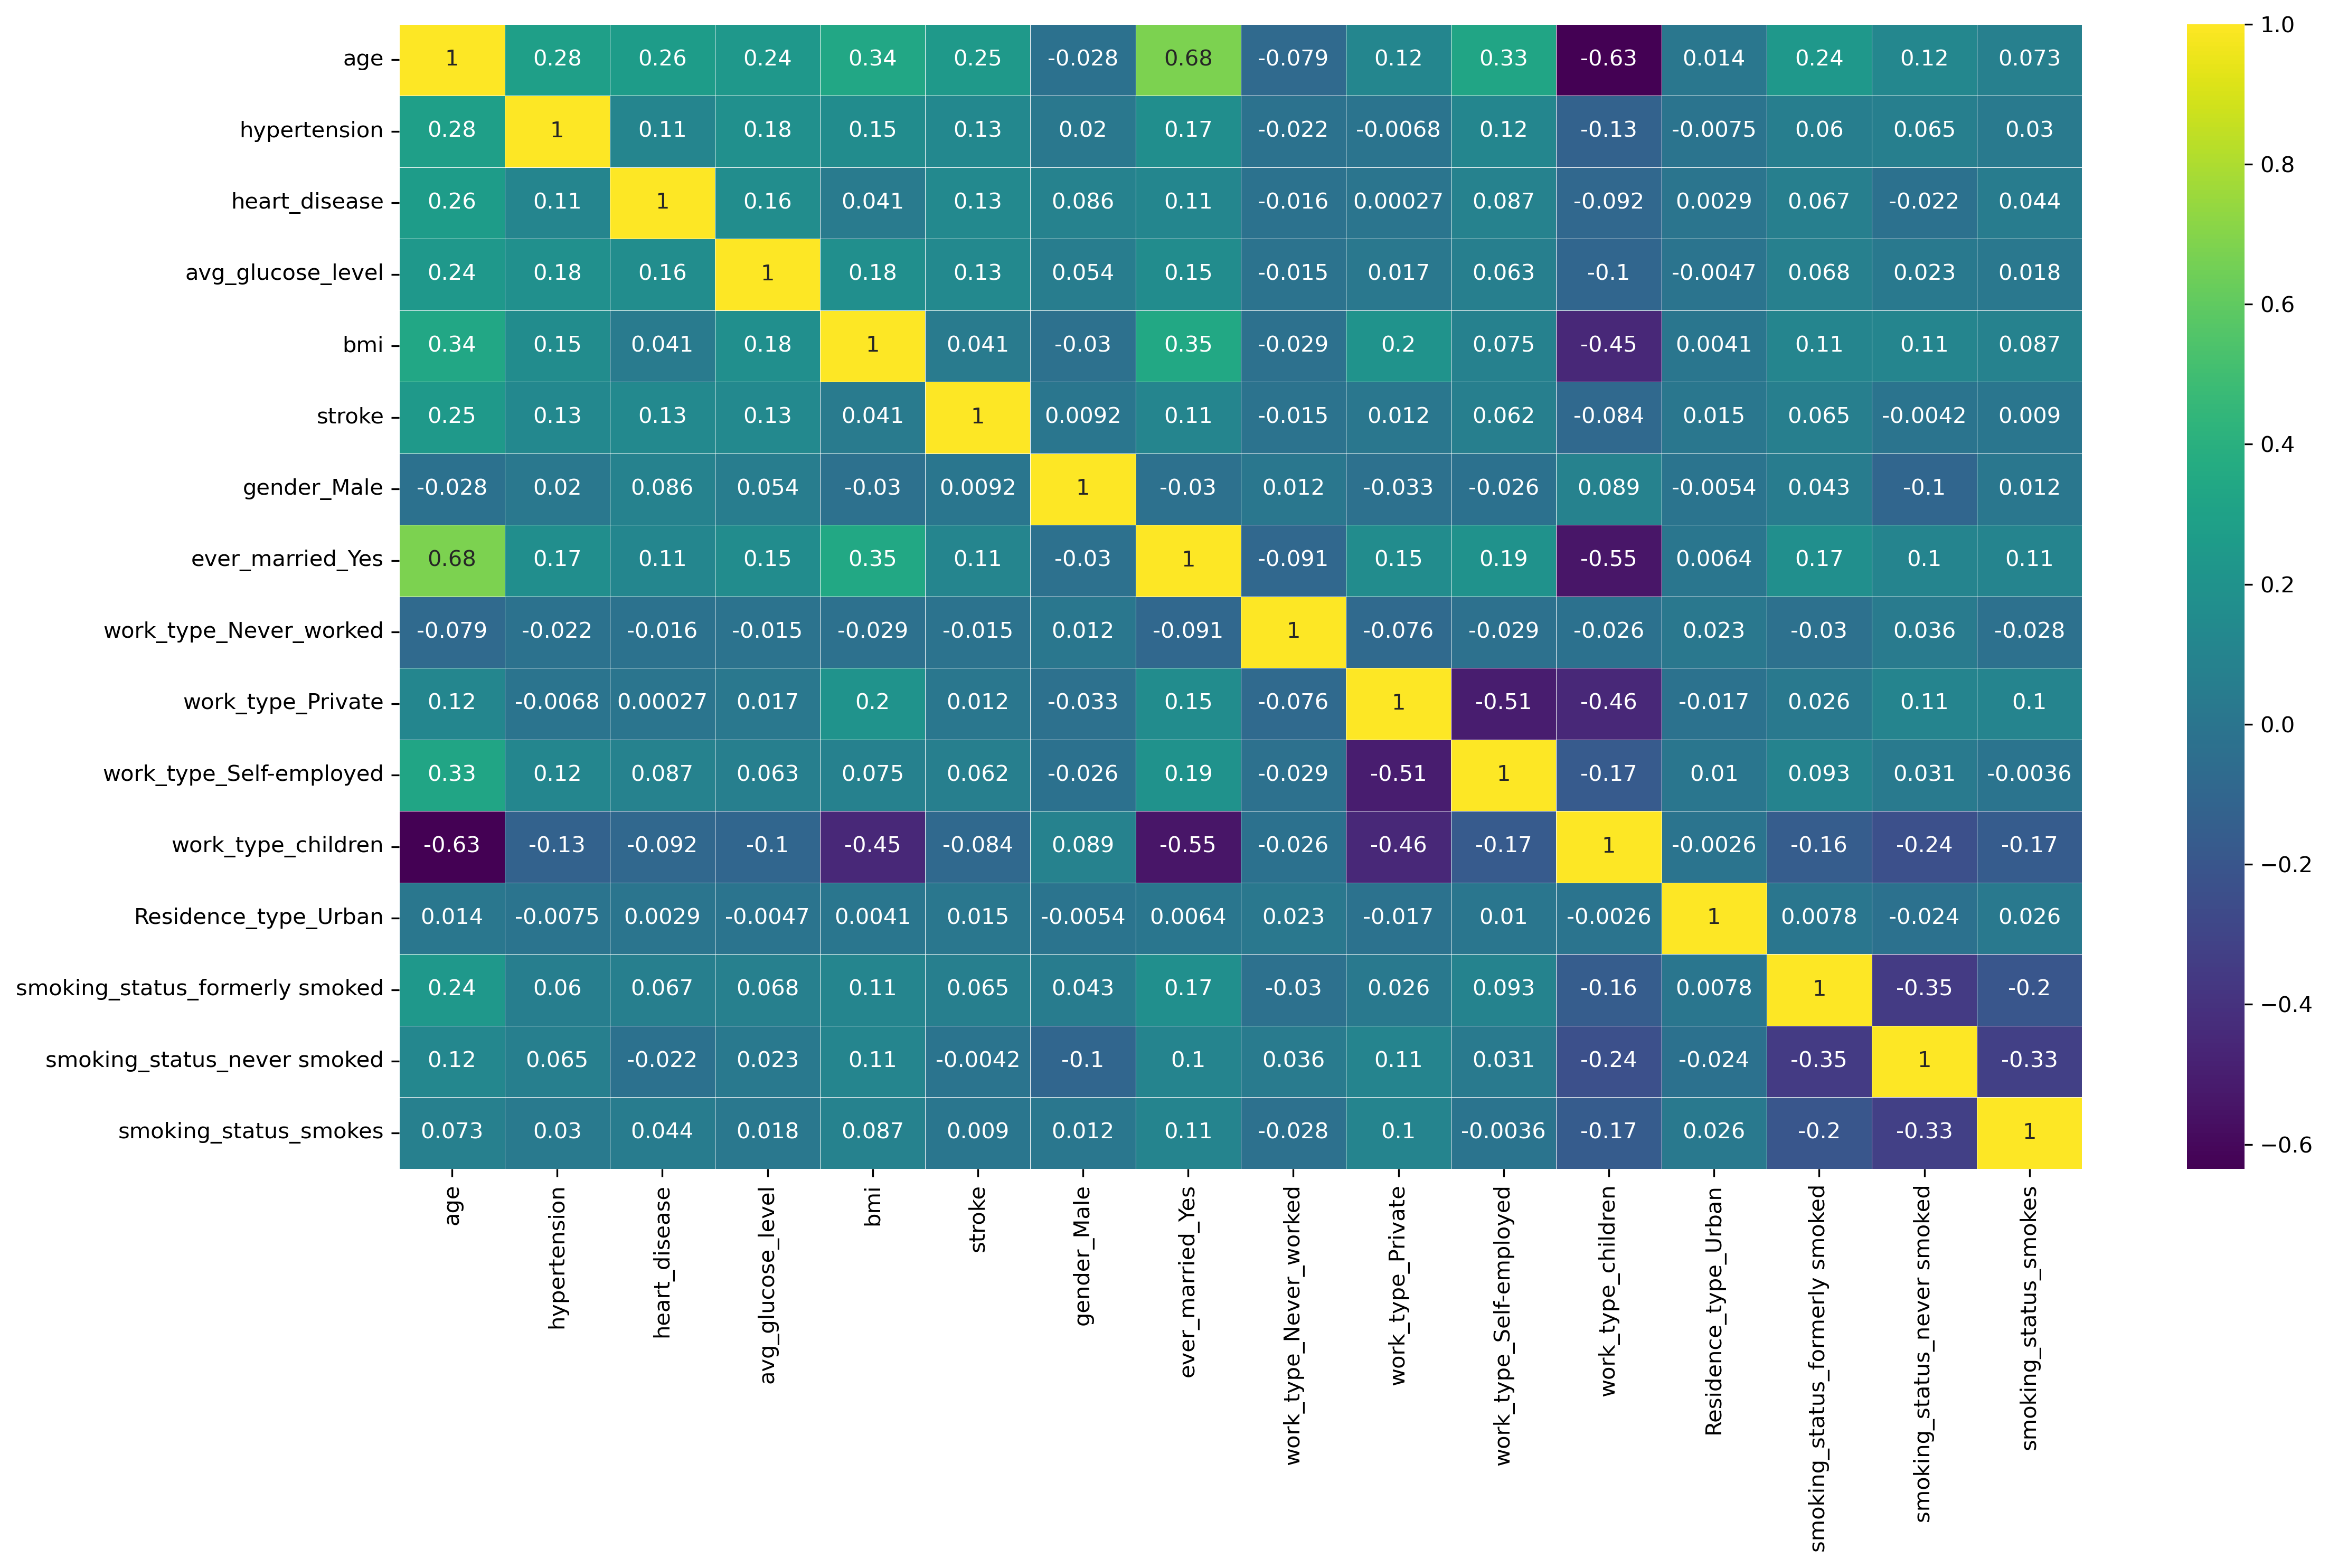

In [64]:
plt.figure(figsize=(16,10),dpi=300)
sns.heatmap(df.corr(),lw=0.2,annot=True,cmap='viridis')
plt.tight_layout()

**Insight**

   - *work_type_children has strong Negative correlation with stroke.*
   - *age has strong Postive correlation with stroke.*
   - *stroke has no such correlation with smoking_status_never_smoked.*
   - *age and ever_married highly correlated.*

### Data Preproccessing

**Split data into input features and target**

In [65]:
df.shape

(5104, 16)

In [66]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [67]:
print(f'X_values : {X.shape[0]}\n\ny_values :\n\n{y.value_counts()}')

X_values : 5104

y_values :

0    4855
1     249
Name: stroke, dtype: int64


**Resample X and y**

In [68]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a 
# over sampling method to have equal representation of both the target classes Using Smote -importing the library.
from imblearn.over_sampling import SMOTE
# ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

# Resampling
X_resampled, y_resampled = smote.fit_resample(X, y)

*Since RandomOverSampler is not performed good enough it coused wrong prediction even has high accuracy,so it's better to use SMOTE*

In [69]:
print(f'X_values : {X_resampled.shape[0]}\n\ny_values :\n\n{y_resampled.value_counts()}')

X_values : 9710

y_values :

1    4855
0    4855
Name: stroke, dtype: int64


**Split data into training & testing sets**

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

**Feature Scaling**

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
con_column = ['age','avg_glucose_level','bmi']

In [73]:
# Creating an instance
scaler = StandardScaler()

In [74]:
# X_train[con_column] = scaler.fit_transform(X_train[con_column])
# X_test[con_column] = scaler.transform(X_test[con_column])

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [75]:
scaled_X_train[0]

array([-0.96998924, -0.30139035, -0.23509768, -0.85323916,  0.31926553,
        1.43634657,  0.61856944, -0.04702911,  1.03184413, -0.37372632,
       -0.27811835, -0.82962413, -0.38160996, -0.59723247,  3.05447004])

## Model Training, Testing and Hyperparameter tunning

### **Logistic Regression**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [77]:
log_model = LogisticRegression()

In [78]:
# Penalty Type
penalty = ['l1', 'l2','elasticnet']

# Using logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 100, 50)
param_grid_log={'C':C,'penalty':penalty}

In [79]:
grid = GridSearchCV(log_model,param_grid_log,cv=5)

In [80]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+000, 1.09854114e+002, 1.20679264e+004, 1.32571137e+006,
       1.45634848e+008, 1.59985872e+010, 1.75751062e+012, 1.93069773e+014,
       2.12095089e+016, 2.32995181e+018, 2.55954792e+020, 2.81176870e+022,
       3.08884360e+024, 3.39322177e+026, 3.72759372e+028, 4.09491506e+030,
       4.49843267e+032, 4.9417...
       1.38949549e+057, 1.52641797e+059, 1.67683294e+061, 1.84206997e+063,
       2.02358965e+065, 2.22299648e+067, 2.44205309e+069, 2.68269580e+071,
       2.94705170e+073, 3.23745754e+075, 3.55648031e+077, 3.90693994e+079,
       4.29193426e+081, 4.71486636e+083, 5.17947468e+085, 5.68986603e+087,
       6.25055193e+089, 6.86648845e+091, 7.54312006e+093, 8.28642773e+095,
       9.10298178e+097, 1.00000000e+100]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [81]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

**Model Performance on Classification Tasks**

In [82]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [83]:
# Accuracy on training set
X_train_predictions = grid.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_predictions,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 0.8593497131087244


In [84]:
# making prediction on test set
y_pred = grid.predict(scaled_X_test)

Accuracy Score : 0.8637143837967731
Classification Report-
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1473
           1       0.86      0.86      0.86      1440

    accuracy                           0.86      2913
   macro avg       0.86      0.86      0.86      2913
weighted avg       0.86      0.86      0.86      2913



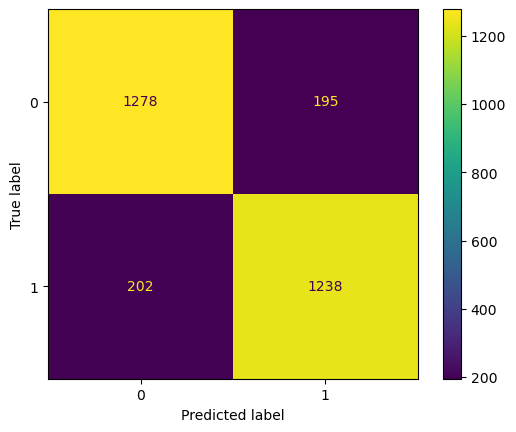

In [85]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}\nClassification Report-\n{classification_report(y_test,y_pred)}')
plot_confusion_matrix(grid,scaled_X_test,y_test);

### **SVM**

In [86]:
from sklearn.svm import SVC
svm = SVC()

In [87]:
param_grid = {'C':[0.1,1,10,100],'gamma' : [0.1,1,10,100]}
grid_model = GridSearchCV(svm,param_grid,cv=5)

In [88]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]})

In [89]:
grid_model.best_params_

{'C': 10, 'gamma': 10}

**Model Performance on Classification Tasks**

In [90]:
# Accuracy on training set
X_train_prediction = grid_model.predict(scaled_X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train) 
print('Accuracy Score of the Training Data is :',training_data_accuracy)

Accuracy Score of the Training Data is : 0.9991172576136531


In [91]:
# making prediction on test set
y_preds = grid_model.predict(scaled_X_test)

Accuracy Score : 0.9416409200137316
Classification Report-
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1473
           1       0.96      0.93      0.94      1440

    accuracy                           0.94      2913
   macro avg       0.94      0.94      0.94      2913
weighted avg       0.94      0.94      0.94      2913



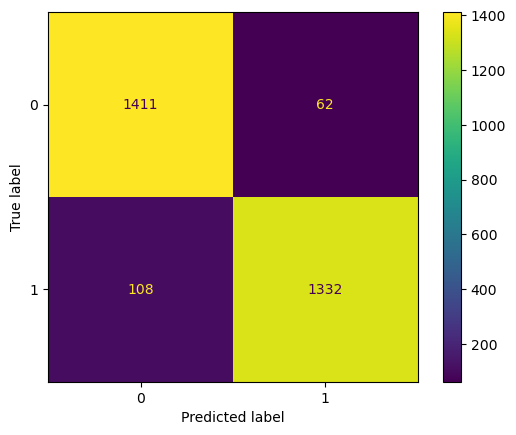

In [92]:
print(f'Accuracy Score : {accuracy_score(y_test,y_preds)}\nClassification Report-\n{classification_report(y_test,y_preds)}')
plot_confusion_matrix(grid_model,scaled_X_test,y_test);

### Drawing Curves

**Logistic Regression**

In [93]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve


ROC Curve


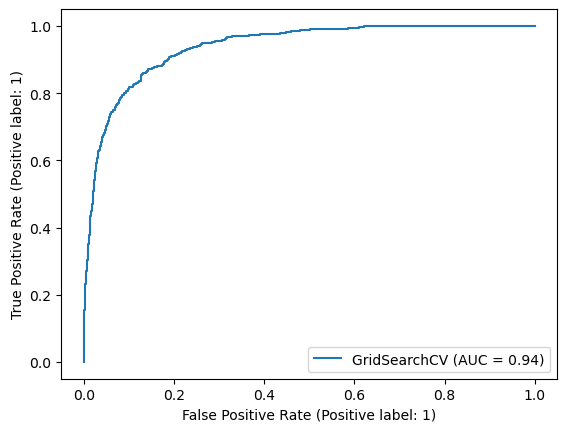

In [94]:
print("\nROC Curve")
plot_roc_curve(grid,scaled_X_test,y_test);

**SVM**


ROC Curve


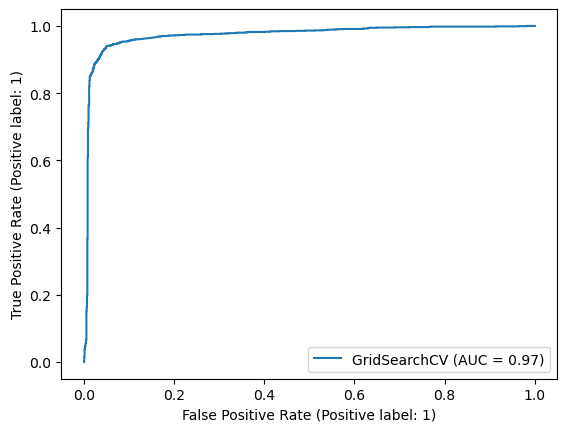

In [95]:
print("\nROC Curve")
plot_roc_curve(grid_model,scaled_X_test,y_test);

**Conclusion**

*Since we found SVM as well fited model compare to Logistic Regression, Based on scores like accuracy,recall and  F1 score SVM is overall good in all these, so our final modal will be SVM.*

### **Final Model** 

**Creating Pipeline**

**Final model** : SVM

**Parameters** : [C=10,gamma=10]

In [96]:
scaler_f = StandardScaler()
estimator = SVC(C=10,gamma=10)
operations = [('scaler',scaler_f),('svm',estimator)]

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
pipe = Pipeline(operations)

In [99]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10, gamma=10))])

In [100]:
pipe_pred = pipe.predict(X_test)
pipe_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [101]:
# print(f'Accuracy Score : {accuracy_score(y_test,pipe_pred)}\nClassification Report-\n{classification_report(y_test,pipe_pred)}')
# plot_confusion_matrix(pipe,X_test,y_test);

## Making a Predictive System -

### **Saving the Model**

In [102]:
import joblib

In [103]:
joblib.dump(pipe,'Stroke_model.pkl')

['Stroke_model.pkl']

In [104]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [105]:
list(X.columns)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [106]:
joblib.dump(list(X.columns),'Stroke_column_names.pkl')

['Stroke_column_names.pkl']

### Loading Model

In [107]:
col_names = joblib.load('Stroke_column_names.pkl')

In [108]:
col_names

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [109]:
loaded_model = joblib.load('Stroke_model.pkl')

In [110]:
#output display for user
def strokefunc(prediction):
    if prediction[0] == 0:
        print('The Patient does not have chance to get Brain Stroke.')
    else:
        print('According to provided data Petient will face Brain Stroke.')

**Input Data for Prediction**

**Input Data 1**

In [111]:
age = 67.00
hypertension = 0.00
heart_disease = 1.00
avg_glucose_level = 228.69
bmi = 36.60
gender_Male = 1.00
ever_married_Yes = 1.00
work_type_Never_worked = 0.00
work_type_Private = 1.00
work_type_Self_employed = 0.00
work_type_children = 0.00
Residence_type_Urban = 1.00
smoking_status_formerly_smoked = 1.00
smoking_status_never_smoked = 0.00
smoking_status_smokes = 0.00

my_values_1 = [np.array([67.0,0,1,228.69,36.6,1,1,0,1,0,0,1,1,0,0])]

In [112]:
input_data_1 = pd.DataFrame(my_values_1,columns = col_names)

In [113]:
prediction_1 = loaded_model.predict(input_data_1)

In [114]:
print(prediction_1)

[1]


In [115]:
strokefunc(prediction_1)

According to provided data Petient will face Brain Stroke.


**Input Data 2**

In [116]:
value_2 =[np.array([51.0,0,0,166.29,25.60,1,1,0,1,0,0,0,1,0,0])]

In [117]:
input_data_2 = pd.DataFrame(value_2,columns = col_names)

In [118]:
prediction_2 = loaded_model.predict(input_data_2)

In [119]:
print(prediction_2)

[0]


In [120]:
strokefunc(prediction_2)

The Patient does not have chance to get Brain Stroke.
